In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os

import json
import os

# Specify the path to your Kaggle API credentials JSON file
kaggle_json_path = '/content/drive/MyDrive/Multicancer/kaggle.json'

# Update with the actual path

# Check if the JSON file exists
if os.path.exists(kaggle_json_path):
    with open(kaggle_json_path, 'r') as json_file:
        kaggle_credentials = json.load(json_file)

    # Extract username and key from the JSON file
    kaggle_username = kaggle_credentials['username']
    kaggle_key = kaggle_credentials['key']

    # Set Kaggle API credentials as environment variables
    os.environ['KAGGLE_USERNAME'] = kaggle_username
    os.environ['KAGGLE_KEY'] = kaggle_key
else:
    print("Kaggle API credentials JSON file not found.")


import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'
!kaggle datasets download -d obulisainaren/multi-cancer -p '/content/'

import zipfile

with zipfile.ZipFile('/content/multi-cancer.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

Mounted at /content/drive
100% 8.61G/8.62G [01:36<00:00, 183MB/s]
100% 8.62G/8.62G [01:36<00:00, 95.7MB/s]


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

In [3]:
allbening=[]
all_early=[]
all_pre=[]
all_pro=[]
for i in os.listdir('/content/Multi Cancer/ALL'):
    All=os.path.join('/content/Multi Cancer/ALL',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='all_pro':
            #print(image_path)
            all_pro.append({'image_path':image_path,'sub_class':'all_pro','main_class':'All'})
        elif i=='all_early':
            #print(image_path)
            all_early.append({'image_path':image_path,'sub_class':'all_early','main_class':'All'})
        elif i=='all_pre':
            #print(image_path)
            all_pre.append({'image_path':image_path,'sub_class':'all_pre','main_class':'All'})
        elif i=='all_benign':
            #print(image_path)
            allbening.append({'image_path':image_path,'sub_class':'all_benign','main_class':'All'})


df1=pd.DataFrame(allbening)
df2=pd.DataFrame(all_early)
df3=pd.DataFrame(all_pre)
df4=pd.DataFrame(all_pro)
all_bening_df=pd.concat([df1, df2,df3,df4])



BrainGlioma=[]
BrainMenin=[]
BrainTumor=[]
for i in os.listdir('/content/Multi Cancer/Brain Cancer'):
    All=os.path.join('/content/Multi Cancer/Brain Cancer',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='brain_glioma':
            #print(image_path)
            BrainGlioma.append({'image_path':image_path,'sub_class':'brain_glioma','main_class':'BrainCancer'})
        elif i=='brain_menin':
            #print(image_path)
            BrainMenin.append({'image_path':image_path,'sub_class':'brain_menin','main_class':'BrainCancer'})
        elif i=='brain_tumor':
            #print(image_path)
            BrainTumor.append({'image_path':image_path,'sub_class':'brain_tumor','main_class':'BrainCancer'})
#         elif i=='all_benign':
#             #print(image_path)
#             allbening.append({'image_path':image_path,'sub_class':'all_benign','main_class':'BrainCancer'})


df21=pd.DataFrame(BrainGlioma)
df22=pd.DataFrame(BrainMenin)
df23=pd.DataFrame(BrainTumor)
BrainCancerDf=pd.concat([df21, df22,df23])



BreastBenign=[]
BreastMalignant=[]

for i in os.listdir('/content/Multi Cancer/Breast Cancer'):
    All=os.path.join('/content/Multi Cancer/Breast Cancer',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='breast_benign':
            #print(image_path)
            BreastBenign.append({'image_path':image_path,'sub_class':'BreastBenign','main_class':'BreastCancer'})
        elif i=='breast_malignant':
            #print(image_path)
            BreastMalignant.append({'image_path':image_path,'sub_class':'BreastMalignant','main_class':'BreastCancer'})
#         elif i=='brain_tumor':
#             #print(image_path)
#             BrainTumor.append({'image_path':image_path,'sub_class':'brain_tumor','main_class':'BrainCancer'})
# #         elif i=='all_benign':
#             #print(image_path)
#             allbening.append({'image_path':image_path,'sub_class':'all_benign','main_class':'BrainCancer'})

df31=pd.DataFrame(BreastBenign)
df32=pd.DataFrame(BreastMalignant)

BreastCancerDf=pd.concat([df31, df32])


cervix_dyk=[]
cervix_koc=[]
cervix_mep=[]
cervix_pab=[]
cervix_sfi=[]

for i in os.listdir('/content/Multi Cancer/Cervical Cancer'):
    All=os.path.join('/content/Multi Cancer/Cervical Cancer',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='cervix_dyk':
            #print(image_path)
            cervix_dyk.append({'image_path':image_path,'sub_class':'cervix_dyk','main_class':'CervicalCancer'})
        elif i=='cervix_koc':
            #print(image_path)
            cervix_koc.append({'image_path':image_path,'sub_class':'cervix_koc','main_class':'CervicalCancer'})
        elif i=='cervix_mep':
            #print(image_path)
            cervix_mep.append({'image_path':image_path,'sub_class':'cervix_mep','main_class':'CervicalCancer'})
        elif i=='cervix_pab':
            #print(image_path)
            cervix_pab.append({'image_path':image_path,'sub_class':'cervix_pab','main_class':'CervicalCancer'})

        elif i=='cervix_sfi':
            #print(image_path)
            cervix_sfi.append({'image_path':image_path,'sub_class':'cervix_sfi','main_class':'CervicalCancer'})



#         elif i=='brain_tumor':
#             #print(image_path)
#             BrainTumor.append({'image_path':image_path,'sub_class':'brain_tumor','main_class':'BrainCancer'})
# #         elif i=='all_benign':
#             #print(image_path)
#             allbening.append({'image_path':image_path,'sub_class':'all_benign','main_class':'BrainCancer'})

df41=pd.DataFrame(cervix_dyk)
df42=pd.DataFrame(cervix_koc)
df43=pd.DataFrame(cervix_mep)
df44=pd.DataFrame(cervix_pab)
df45=pd.DataFrame(cervix_sfi)
CervicalCancer=pd.concat([df41, df42,df43,df44,df45])


kidney_normal=[]
kidney_tumor=[]

for i in os.listdir('/content/Multi Cancer/Kidney Cancer'):
    All=os.path.join('/content/Multi Cancer/Kidney Cancer',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='kidney_normal':
            #print(image_path)
            kidney_normal.append({'image_path':image_path,'sub_class':'kidney_normal','main_class':'KidneyCancer'})
        elif i=='kidney_tumor':
            #print(image_path)
            kidney_tumor.append({'image_path':image_path,'sub_class':'kidney_tumor','main_class':'KidneyCancer'})
#         elif i=='brain_tumor':
#             #print(image_path)
#             BrainTumor.append({'image_path':image_path,'sub_class':'brain_tumor','main_class':'BrainCancer'})
# #         elif i=='all_benign':
#             #print(image_path)
#             allbening.append({'image_path':image_path,'sub_class':'all_benign','main_class':'BrainCancer'})

df51=pd.DataFrame(kidney_normal)
df52=pd.DataFrame(kidney_tumor)

KidneyCancer=pd.concat([df51, df52])


colon_aca=[]
colon_bnt=[]
lung_aca=[]
lung_bnt=[]
lung_scc=[]

for i in os.listdir('/content/Multi Cancer/Lung and Colon Cancer'):
    All=os.path.join('/content/Multi Cancer/Lung and Colon Cancer',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='colon_aca':
            #print(image_path)
            colon_aca.append({'image_path':image_path,'sub_class':'colon_aca','main_class':'ColonCancer'})
        elif i=='colon_bnt':
            #print(image_path)
            colon_bnt.append({'image_path':image_path,'sub_class':'colon_bnt','main_class':'ColonCancer'})
        elif i=='lung_aca':
            #print(image_path)
            lung_aca.append({'image_path':image_path,'sub_class':'lung_aca','main_class':'ColonCancer'})
        elif i=='lung_bnt':
            #print(image_path)
            lung_bnt.append({'image_path':image_path,'sub_class':'lung_bnt','main_class':'ColonCancer'})

        elif i=='lung_scc':
            #print(image_path)
            lung_scc.append({'image_path':image_path,'sub_class':'lung_scc','main_class':'ColonCancer'})



#         elif i=='brain_tumor':
#             #print(image_path)
#             BrainTumor.append({'image_path':image_path,'sub_class':'brain_tumor','main_class':'BrainCancer'})
# #         elif i=='all_benign':
#             #print(image_path)
#             allbening.append({'image_path':image_path,'sub_class':'all_benign','main_class':'BrainCancer'})

df61=pd.DataFrame(colon_aca)
df62=pd.DataFrame(colon_bnt)
df63=pd.DataFrame(lung_aca)
df64=pd.DataFrame(lung_bnt)
df65=pd.DataFrame(lung_scc)
ColonCancer=pd.concat([df61, df62,df63,df64,df65])


lymph_cll=[]
lymph_fl=[]
lymp_mcl=[]
for i in os.listdir('/content/Multi Cancer/Lymphoma'):
    All=os.path.join('/content/Multi Cancer/Lymphoma',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='lymph_cll':
            #print(image_path)
            lymph_cll.append({'image_path':image_path,'sub_class':'lymph_cll','main_class':'Lymphoma'})
        elif i=='lymph_fl':
            #print(image_path)
            lymph_fl.append({'image_path':image_path,'sub_class':'lymph_fl','main_class':'Lymphoma'})
        elif i=='lymp_mcl':
            #print(image_path)
            lymp_mcl.append({'image_path':image_path,'sub_class':'lymp_mcl','main_class':'Lymphoma'})
#         elif i=='all_benign':
#             #print(image_path)
#             allbening.append({'image_path':image_path,'sub_class':'all_benign','main_class':'BrainCancer'})


df71=pd.DataFrame(lymph_cll)
df72=pd.DataFrame(lymph_fl)
df73=pd.DataFrame(lymp_mcl)
Lymphoma=pd.concat([df71, df72,df73])


oral_normal=[]
oral_scc=[]

for i in os.listdir('/content/Multi Cancer/Oral Cancer'):
    All=os.path.join('/content/Multi Cancer/Oral Cancer',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='oral_normal':
            #print(image_path)
            oral_normal.append({'image_path':image_path,'sub_class':'oral_normal','main_class':'OralCancer'})
        elif i=='oral_scc':
            #print(image_path)
            oral_scc.append({'image_path':image_path,'sub_class':'oral_scc','main_class':'OralCancer'})

df81=pd.DataFrame(oral_normal)
df82=pd.DataFrame(oral_normal)

OralCancer=pd.concat([df81, df82])

combined=pd.concat([all_bening_df,BrainCancerDf,BreastCancerDf,CervicalCancer,KidneyCancer,ColonCancer,Lymphoma,OralCancer],ignore_index=True)





combined['int_main_class'] = pd.factorize(combined['main_class'])[0]
combined['int_sub_class'] = pd.factorize(combined['sub_class'])[0]


np.random.seed(42)
combined=combined.sample(frac=1)

In [ ]:
combined.shape

(125002, 5)

In [ ]:
np.random.seed(42)
train=combined.iloc[0:int(len(combined)*0.8),:]
others=combined.iloc[int(len(combined)*0.8):,:]
validation=others.iloc[0:int(len(others)*0.5),:]
test=others.iloc[int(len(others)*0.5):,:]

In [ ]:
train.sub_class.nunique()

24

In [ ]:
vggmodel = tf.keras.models.load_model('/content/drive/MyDrive/Multicancer/only_vgg_best_model.h5')
mobilenet=tf.keras.models.load_model('/content/drive/MyDrive/Multicancer/only_mobilenet_best_model.h5')

In [ ]:

class CancerImageDataGenerator(tf.keras.utils.Sequence):
    def __init__(self,data=combined,batch_size=256,image_size=(100,100)):
        self.data=data
        self.image_size=image_size
        self.batch_size=batch_size
        self.num_main_class=len(self.data.main_class.unique())
        self.num_sub_class=len(self.data.sub_class.unique())
        self.indexes=np.arange(len(self.data))
        self.current_index = 0
    def __len__(self):
        return int(np.ceil(len(self.data)/self.batch_size))

    def __getitem__(self, index):
        start_idx = index * self.batch_size
        end_idx = (index + 1) * self.batch_size

        batch_indexes = self.indexes[start_idx:end_idx]
        X, y_main, y_sub = self.__data_generation(batch_indexes)

        return X, [y_main, y_sub]

    def on_epoch_end(self):
        np.random.shuffle(self.indexes)
    def __iter__(self):
        return self
    def __next__(self):
        if self.current_index >= len(self):
            # If we have iterated over all batches, reset the index and raise StopIteration
            self.current_index = 0
            raise StopIteration
        else:
            # Get the next batch and increment the current index
            batch_X, batch_Y = self.__getitem__(self.current_index)
            self.current_index += 1
            return batch_X, batch_Y

    def __data_generation(self, batch_indexes):
        X = np.empty((len(batch_indexes), *self.image_size, 3))
        y_main = np.empty((len(batch_indexes)), dtype=int)
        y_sub = np.empty((len(batch_indexes)), dtype=int)

        for i, idx in enumerate(batch_indexes):
            image_path = self.data.iloc[idx]['image_path']
            img = load_and_preprocess_image(image_path, self.image_size)
            X[i,] = img
            y_main[i] = self.data.iloc[idx]['int_main_class']
            y_sub[i] = self.data.iloc[idx]['int_sub_class']

        y_main = to_categorical(y_main, num_classes=self.num_main_class)
        y_sub = to_categorical(y_sub, num_classes=self.num_sub_class)

        return X, y_main, y_sub



def load_and_preprocess_image(image_path, image_size):
    # Load and preprocess the image using your preferred image processing library (e.g., PIL, OpenCV)
    # You may need to resize, normalize, and perform other preprocessing steps.
    # Here's a simple example using TensorFlow and tf.image:
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, image_size)
    #image = tf.image.convert_image_dtype(image, tf.float32)
    #image = (image - 0.5) * 2.0  # Normalize to range [-1, 1]
    image=image/(255.0)
    return image




import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

batch_size = 1024
train_Generator = CancerImageDataGenerator(data=train, batch_size=batch_size)
validation_Generator = CancerImageDataGenerator(data=validation, batch_size=batch_size)
test_Generator = CancerImageDataGenerator(data=test, batch_size=batch_size)






13/13 [==============================] - 119s 9s/step - loss: 34.9120 - dense_2_loss: 19.0582 - dense_3_loss: 15.8537 - dense_2_accuracy: 0.0013 - dense_3_accuracy: 0.0366


[34.91197967529297,
 19.058225631713867,
 15.85374641418457,
 0.0013075916795060039,
 0.03661256656050682]

In [ ]:









import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Assuming test_Generator yields tuples (X_test, [Y_main_test, Y_sub_test])
X_test, [Y_main_test, Y_sub_test] = next(test_Generator)

# Predictions for both outputs
predictions_main, predictions_sub = model.predict(X_test)

# Convert one-hot encoded labels back to class indices
y_main_true = np.argmax(Y_main_test, axis=1)
y_main_pred = np.argmax(predictions_main, axis=1)

y_sub_true = np.argmax(Y_sub_test, axis=1)
y_sub_pred = np.argmax(predictions_sub, axis=1)

# Confusion matrices
conf_matrix_main = confusion_matrix(y_main_true, y_main_pred)
conf_matrix_sub = confusion_matrix(y_sub_true, y_sub_pred)

# Print classification reports
class_report_main = classification_report(y_main_true, y_main_pred)
class_report_sub = classification_report(y_sub_true, y_sub_pred)

print("Confusion Matrix - Main Class:")
print(conf_matrix_main)
print("\nClassification Report - Main Class:")
print(class_report_main)

print("\nConfusion Matrix - Sub Class:")
print(conf_matrix_sub)
print("\nClassification Report - Sub Class:")
print(class_report_sub)


import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Assuming test_Generator yields tuples (X_test, [Y_main_test, Y_sub_test])
X_test, [Y_main_test, Y_sub_test] = next(test_Generator)

# Predictions for both outputs
predictions_main, predictions_sub = model.predict(X_test)

# Convert one-hot encoded labels back to class indices
y_main_true = np.argmax(Y_main_test, axis=1)
y_main_pred = np.argmax(predictions_main, axis=1)

y_sub_true = np.argmax(Y_sub_test, axis=1)
y_sub_pred = np.argmax(predictions_sub, axis=1)

# Confusion matrices
conf_matrix_main = confusion_matrix(y_main_true, y_main_pred)
conf_matrix_sub = confusion_matrix(y_sub_true, y_sub_pred)

# Print classification reports
class_report_main = classification_report(y_main_true, y_main_pred)
class_report_sub = classification_report(y_sub_true, y_sub_pred)

print("Confusion Matrix - Main Class:")
print(conf_matrix_main)
print("\nClassification Report - Main Class:")
print(class_report_main)

print("\nConfusion Matrix - Sub Class:")
print(conf_matrix_sub)
print("\nClassification Report - Sub Class:")
print(class_report_sub)



In [ ]:
class CancerImageDataGenerator(tf.keras.utils.Sequence):
    def __init__(self,data=combined,batch_size=256,image_size=(100,100)):
        self.data=data
        self.image_size=image_size
        self.batch_size=batch_size
        self.num_main_class=len(self.data.main_class.unique())
        self.num_sub_class=len(self.data.sub_class.unique())
        self.indexes=np.arange(len(self.data))
        self.current_index = 0
    def __len__(self):
        return int(np.ceil(len(self.data)/self.batch_size))

    def __getitem__(self, index):
        start_idx = index * self.batch_size
        end_idx = (index + 1) * self.batch_size

        batch_indexes = self.indexes[start_idx:end_idx]
        X, y_main, y_sub = self.__data_generation(batch_indexes)

        return X, [y_main, y_sub]

    def on_epoch_end(self):
        np.random.shuffle(self.indexes)
    def __iter__(self):
        return self
    def __next__(self):
        if self.current_index >= len(self):
            # If we have iterated over all batches, reset the index and raise StopIteration
            self.current_index = 0
            raise StopIteration
        else:
            # Get the next batch and increment the current index
            batch_X, batch_Y = self.__getitem__(self.current_index)
            self.current_index += 1
            return batch_X, batch_Y

    def __data_generation(self, batch_indexes):
        X = np.empty((len(batch_indexes), *self.image_size, 3))
        y_main = np.empty((len(batch_indexes)), dtype=int)
        y_sub = np.empty((len(batch_indexes)), dtype=int)

        for i, idx in enumerate(batch_indexes):
            image_path = self.data.iloc[idx]['image_path']
            img = load_and_preprocess_image(image_path, self.image_size)
            X[i,] = img
            y_main[i] = self.data.iloc[idx]['int_main_class']
            y_sub[i] = self.data.iloc[idx]['int_sub_class']

        y_main = to_categorical(y_main, num_classes=self.num_main_class)
        y_sub = to_categorical(y_sub, num_classes=self.num_sub_class)

        return X, y_main, y_sub



def load_and_preprocess_image(image_path, image_size):
    # Load and preprocess the image using your preferred image processing library (e.g., PIL, OpenCV)
    # You may need to resize, normalize, and perform other preprocessing steps.
    # Here's a simple example using TensorFlow and tf.image:
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, image_size)
    image = tf.image.convert_image_dtype(image, tf.float32)
    #image = (image - 0.5) * 2.0  # Normalize to range [-1, 1]
    image=image/(255.0)
    return image

batch_size = 1024
np.random.seed(42)
train_Generator = CancerImageDataGenerator(data=train, batch_size=batch_size)
validation_Generator = CancerImageDataGenerator(data=validation, batch_size=batch_size)
test_Generator = CancerImageDataGenerator(data=test, batch_size=batch_size)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

class CancerImageDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, data, batch_size=256, image_size=(100, 100)):
        self.data = data
        self.image_size = image_size
        self.batch_size = batch_size
        self.num_main_class = len(data['main_class'].unique())
        self.num_sub_class = len(data['sub_class'].unique())
        self.indexes = np.arange(len(data))
        self.current_index = 0

        # Compute class indices and label names for main class
        self.main_class_indices = {class_name: i for i, class_name in enumerate(data['main_class'].unique())}
        self.main_label_names = {v: k for k, v in self.main_class_indices.items()}

        # Compute class indices and label names for sub class
        self.sub_class_indices = {class_name: i for i, class_name in enumerate(data['sub_class'].unique())}
        self.sub_label_names = {v: k for k, v in self.sub_class_indices.items()}

    def __len__(self):
        return int(np.ceil(len(self.data) / self.batch_size))

    def __getitem__(self, index):
        start_idx = index * self.batch_size
        end_idx = (index + 1) * self.batch_size

        batch_indexes = self.indexes[start_idx:end_idx]
        X, y_main, y_sub = self.__data_generation(batch_indexes)

        return X, [y_main, y_sub]

    def on_epoch_end(self):
        np.random.shuffle(self.indexes)

    def __iter__(self):
        return self

    def __next__(self):
        if self.current_index >= len(self):
            self.current_index = 0
            raise StopIteration
        else:
            batch_X, batch_Y = self.__getitem__(self.current_index)
            self.current_index += 1
            return batch_X, batch_Y

    def __data_generation(self, batch_indexes):
        X = np.empty((len(batch_indexes), *self.image_size, 3))
        y_main = np.empty((len(batch_indexes)), dtype=int)
        y_sub = np.empty((len(batch_indexes)), dtype=int)

        for i, idx in enumerate(batch_indexes):
            image_path = self.data.iloc[idx]['image_path']
            img = self.load_and_preprocess_image(image_path, self.image_size)
            X[i,] = img
            y_main[i] = self.main_class_indices[self.data.iloc[idx]['main_class']]
            y_sub[i] = self.sub_class_indices[self.data.iloc[idx]['sub_class']]

        y_main = to_categorical(y_main, num_classes=self.num_main_class)
        y_sub = to_categorical(y_sub, num_classes=self.num_sub_class)

        return X, y_main, y_sub

    @staticmethod
    def load_and_preprocess_image(image_path, image_size):
        image = tf.io.read_file(image_path)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, image_size)
        image = tf.image.convert_image_dtype(image, tf.float32)
        image = image / 255.0
        return image

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

batch_size = 1024
np.random.seed(42)
train_Generator = CancerImageDataGenerator(data=train, batch_size=batch_size)
validation_Generator = CancerImageDataGenerator(data=validation, batch_size=batch_size)
test_Generator = CancerImageDataGenerator(data=test, batch_size=batch_size)

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Function to plot images
# def plot_images(images, true_labels, predicted_labels, true_label_names, predicted_label_names, model_name):
#     plt.figure(figsize=(15, 5))
#     for i in range(len(images)):
#         plt.subplot(1, len(images), i + 1)
#         plt.imshow(images[i])
#         true_label_name = true_label_names[true_labels[i]]
#         predicted_label_name = predicted_label_names[predicted_labels[i]]
#         plt.title(f"True label: {true_label_name}\nPredicted label: {predicted_label_name}")
#         plt.axis('off')
#     plt.suptitle(f"Images falsely predicted by {model_name} but correctly predicted by the other model", fontsize=16)
#     plt.show()

# # Load the models
# vgg_model = tf.keras.models.load_model('/content/drive/MyDrive/Multicancer/vgg_best_model(3).h5')
# resnet_model = tf.keras.models.load_model('/content/drive/MyDrive/Multicancer/resnet50_best_model.h5')

# # Function to extract label names from the generator


In [ ]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Function to predict and get true labels
# def predict_and_get_labels(model, data_generator):
#     y_true_main = []
#     y_pred_main = []
#     y_true_sub = []
#     y_pred_sub = []

#     for i in range(len(data_generator)):
#         batch_X, [batch_y_main, batch_y_sub] = data_generator[i]
#         y_true_main.extend(tf.argmax(batch_y_main, axis=1).numpy())
#         y_true_sub.extend(tf.argmax(batch_y_sub, axis=1).numpy())

#         batch_pred = model.predict(batch_X)
#         y_pred_main.extend(tf.argmax(batch_pred[0], axis=1).numpy())
#         y_pred_sub.extend(tf.argmax(batch_pred[1], axis=1).numpy())

#     return np.array(y_true_main), np.array(y_pred_main), np.array(y_true_sub), np.array(y_pred_sub)




23/23 [==============================] - 1s 11ms/step


AttributeError: 'CancerImageDataGenerator' object has no attribute 'main_label_names'

<Figure size 800x600 with 0 Axes>

In [ ]:
# # Predictions for VGG model
# y_true_main_vgg, y_pred_main_vgg, y_true_sub_vgg, y_pred_sub_vgg = predict_and_get_labels(vggmodel, test_Generator)

# # Predictions for MobileNet model
# y_true_main_mobilenet, y_pred_main_mobilenet, y_true_sub_mobilenet, y_pred_sub_mobilenet = predict_and_get_labels(mobilenet, test_Generator)


In [ ]:
# # Confusion matrix for VGG model - Main Class
# cm_main_vgg = confusion_matrix(y_true_main_vgg, y_pred_main_vgg)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_main_vgg, annot=True, fmt="d", cmap="Blues", xticklabels=train_Generator.main_label_names.values(), yticklabels=train_Generator.main_label_names.values())
# plt.title('Confusion Matrix - Main Class (VGG Model)')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

# # Confusion matrix for VGG model - Sub Class
# cm_sub_vgg = confusion_matrix(y_true_sub_vgg, y_pred_sub_vgg)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_sub_vgg, annot=True, fmt="d", cmap="Blues", xticklabels=train_Generator.sub_label_names.values(), yticklabels=train_Generator.sub_label_names.values())
# plt.title('Confusion Matrix - Sub Class (VGG Model)')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

# # Confusion matrix for MobileNet model - Main Class
# cm_main_mobilenet = confusion_matrix(y_true_main_mobilenet, y_pred_main_mobilenet)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_main_mobilenet, annot=True, fmt="d", cmap="Blues", xticklabels=train_Generator.main_label_names.values(), yticklabels=train_Generator.main_label_names.values())
# plt.title('Confusion Matrix - Main Class (MobileNet Model)')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

# # Confusion matrix for MobileNet model - Sub Class
# cm_sub_mobilenet = confusion_matrix(y_true_sub_mobilenet, y_pred_sub_mobilenet)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_sub_mobilenet, annot=True, fmt="d", cmap="Blues", xticklabels=train_Generator.sub_label_names.values(), yticklabels=train_Generator.sub_label_names.values())
# plt.title('Confusion Matrix - Sub Class (MobileNet Model)')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()


In [ ]:
# # Function to print classification report
# # Function to print classification report
# def print_classification_report(y_true, y_pred, label_names):
#     report = classification_report(y_true, y_pred, target_names=label_names.values())
#     print(report)


# # Print classification report for VGG model - Main Class
# print("VGG Model - Main Class:")
# print_classification_report(y_true_main_vgg, y_pred_main_vgg, train_Generator.main_label_names)

# # Print classification report for VGG model - Sub Class
# print("\nVGG Model - Sub Class:")
# print_classification_report(y_true_sub_vgg, y_pred_sub_vgg, train_Generator.sub_label_names)

# # Print classification report for MobileNet model - Main Class
# print("\nMobileNet Model - Main Class:")
# print_classification_report(y_true_main_mobilenet, y_pred_main_mobilenet, train_Generator.main_label_names)

# # Print classification report for MobileNet model - Sub Class
# print("\nMobileNet Model - Sub Class:")
# print_classification_report(y_true_sub_mobilenet, y_pred_sub_mobilenet, train_Generator.sub_label_names)



In [ ]:
labels_names=test_Generator.data.main_class.unique()
labels_names_sub=test_Generator.data.sub_class.unique()

In [ ]:
import os
os.listdir('/content/drive/MyDrive/Multicancer')

['Tensorflow Multicancer.ipynb',
 'vgg_history.pkl',
 'vgg_best_model.h5',
 'vgg_best_model(3).h5',
 'inception_history.pkl',
 'resnet50_history.pkl',
 'kaggle_working.h5',
 'inception_best_model.h5',
 'resnet50_best_model.h5',
 'xception_model_history.pkl',
 'xception_model_best_model(1).h5',
 'mobilenet_history.pkl',
 'Version2',
 'kaggle.json',
 'Model',
 'only_vgg_history .pkl',
 'only_vgg_best_model.h5',
 'only_mobilenet_history.pkl',
 'only_mobilenet_best_model.h5',
 'Test_multicancer.ipynb']

In [ ]:
import tensorflow as tf

# Load the saved model from the .h5 file
vggmodel = tf.keras.models.load_model('/content/drive/MyDrive/Multicancer/vgg_best_model(3).h5')
resnet= tf.keras.models.load_model('/content/drive/MyDrive/Multicancer/resnet50_best_model.h5')
xception= tf.keras.models.load_model('/content/drive/MyDrive/Multicancer/xception_model_best_model(1).h5')
inception= tf.keras.models.load_model('/content/drive/MyDrive/Multicancer/inception_best_model.h5')


In [ ]:
mobilenet=tf.keras.models.load_model('/content/drive/MyDrive/Multicancer/only_mobilenet_best_model.h5')

In [ ]:
vggmodel = tf.keras.models.load_model('/content/drive/MyDrive/Multicancer/vgg_best_model(3).h5')

In [ ]:
vggmodel.evaluate(test_Generator)

InvalidArgumentError: Graph execution error:

Detected at node categorical_crossentropy_1/softmax_cross_entropy_with_logits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-53-4b1ff07658c5>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2296, in evaluate

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 4108, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1919, in test_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5579, in categorical_crossentropy

logits and labels must be broadcastable: logits_size=[1024,24] labels_size=[1024,26]
	 [[{{node categorical_crossentropy_1/softmax_cross_entropy_with_logits}}]] [Op:__inference_test_function_1586814]

7/7 [==============================] - 1s 84ms/step


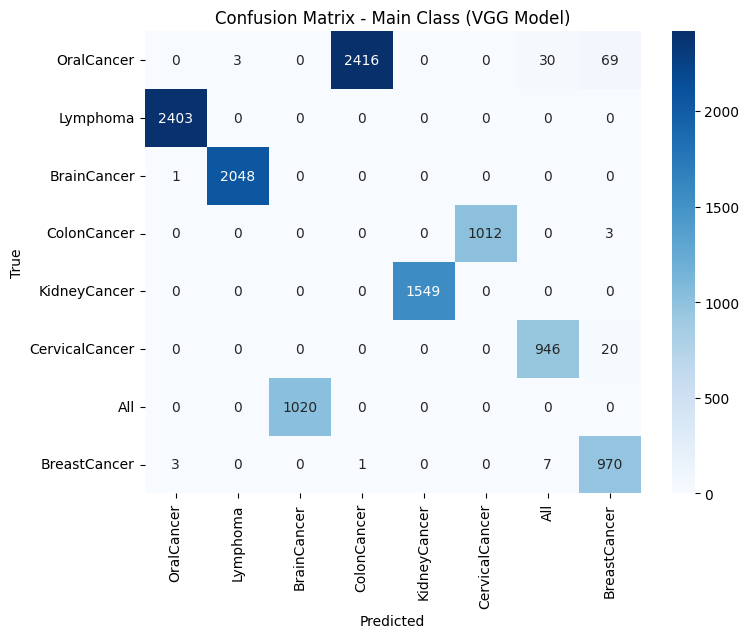

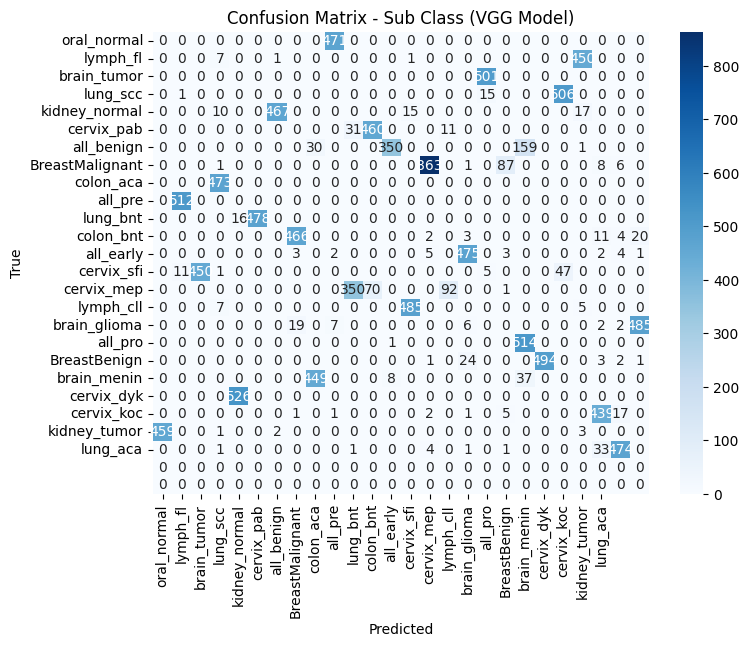

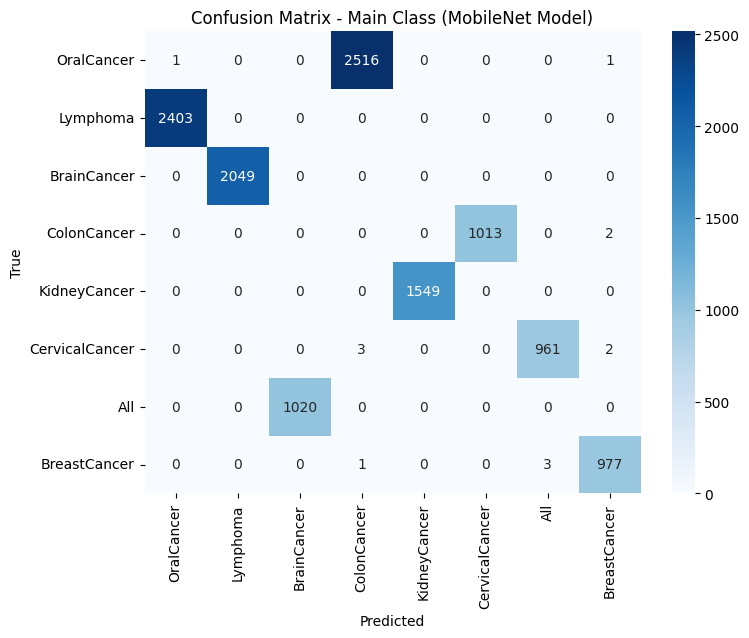

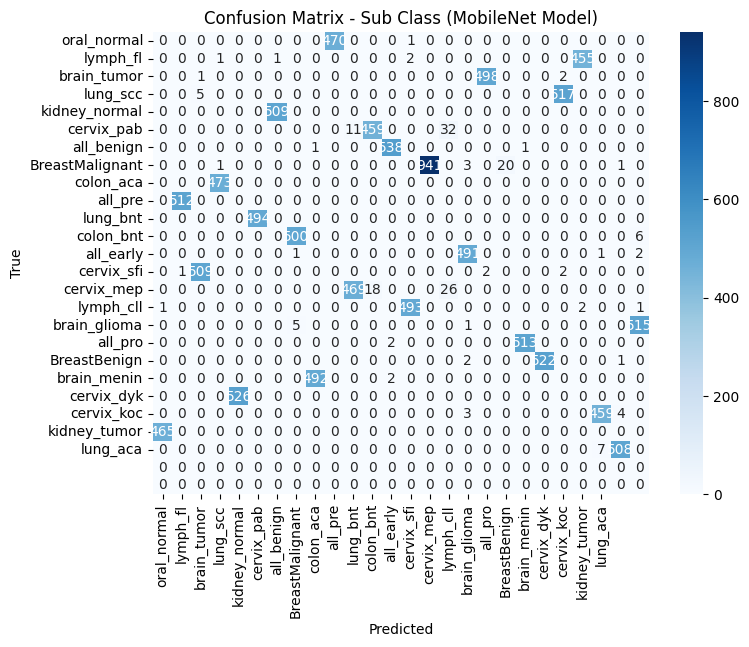

In [ ]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Function to predict and get true labels
# def predict_and_get_labels(model, data_generator):
#     y_true_main = []
#     y_pred_main = []
#     y_true_sub = []
#     y_pred_sub = []

#     for i in range(len(data_generator)):
#         batch_X, [batch_y_main, batch_y_sub] = data_generator[i]
#         y_true_main.extend(tf.argmax(batch_y_main, axis=1).numpy())
#         y_true_sub.extend(tf.argmax(batch_y_sub, axis=1).numpy())

#         batch_pred = model.predict(batch_X)
#         y_pred_main.extend(tf.argmax(batch_pred[0], axis=1).numpy())
#         y_pred_sub.extend(tf.argmax(batch_pred[1], axis=1).numpy())

#     return np.array(y_true_main), np.array(y_pred_main), np.array(y_true_sub), np.array(y_pred_sub)

# # Predictions for VGG model
# y_true_main_vgg, y_pred_main_vgg, y_true_sub_vgg, y_pred_sub_vgg = predict_and_get_labels(vggmodel, test_Generator)

# # Predictions for MobileNet model
# y_true_main_mobilenet, y_pred_main_mobilenet, y_true_sub_mobilenet, y_pred_sub_mobilenet = predict_and_get_labels(mobilenet, test_Generator)

# # Confusion matrix for VGG model - Main Class
# cm_main_vgg = confusion_matrix(y_true_main_vgg, y_pred_main_vgg)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_main_vgg, annot=True, fmt="d", cmap="Blues", xticklabels=train_Generator.main_label_names.values(), yticklabels=train_Generator.main_label_names.values())
# plt.title('Confusion Matrix - Main Class (VGG Model)')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

# # Confusion matrix for VGG model - Sub Class
# cm_sub_vgg = confusion_matrix(y_true_sub_vgg, y_pred_sub_vgg)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_sub_vgg, annot=True, fmt="d", cmap="Blues", xticklabels=train_Generator.sub_label_names.values(), yticklabels=train_Generator.sub_label_names.values())
# plt.title('Confusion Matrix - Sub Class (VGG Model)')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

# # Confusion matrix for MobileNet model - Main Class
# cm_main_mobilenet = confusion_matrix(y_true_main_mobilenet, y_pred_main_mobilenet)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_main_mobilenet, annot=True, fmt="d", cmap="Blues", xticklabels=train_Generator.main_label_names.values(), yticklabels=train_Generator.main_label_names.values())
# plt.title('Confusion Matrix - Main Class (MobileNet Model)')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

# # Confusion matrix for MobileNet model - Sub Class
# cm_sub_mobilenet = confusion_matrix(y_true_sub_mobilenet, y_pred_sub_mobilenet)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_sub_mobilenet, annot=True, fmt="d", cmap="Blues", xticklabels=train_Generator.sub_label_names.values(), yticklabels=train_Generator.sub_label_names.values())
# plt.title('Confusion Matrix - Sub Class (MobileNet Model)')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()


In [ ]:
vgg_model = tf.keras.models.load_model('/content/drive/MyDrive/Multicancer/vgg_best_model(3).h5')

23/23 [==============================] - 1s 8ms/step


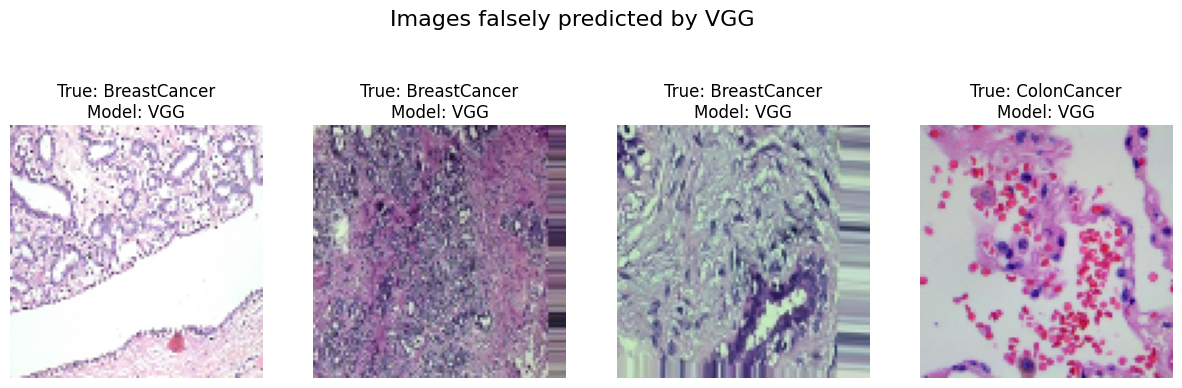

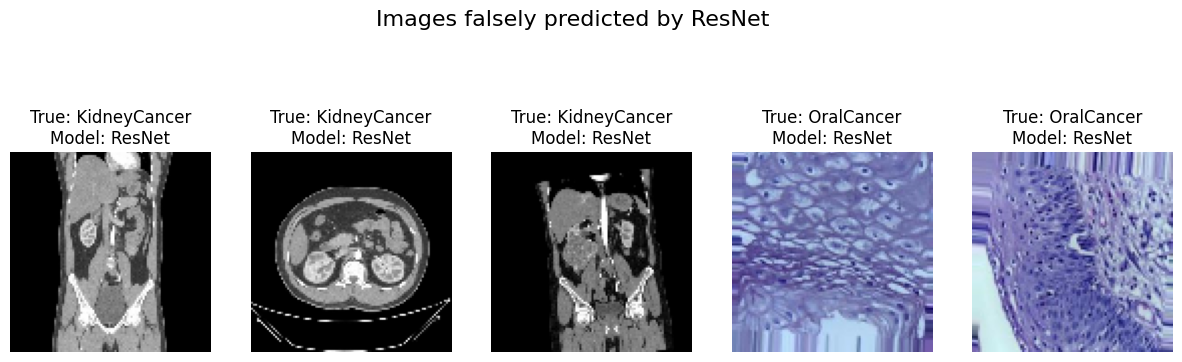

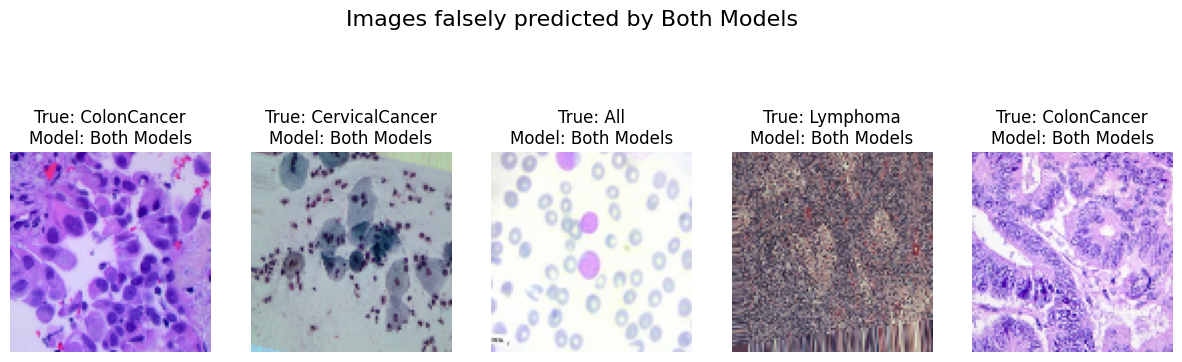

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

class CancerImageDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, data, vgg_model, resnet_model, batch_size=256, image_size=(100, 100)):
        self.data = data
        self.image_size = image_size
        self.batch_size = batch_size
        self.num_main_class = len(data['main_class'].unique())
        self.num_sub_class = len(data['sub_class'].unique())
        self.indexes = np.arange(len(data))
        self.current_index = 0
        self.vgg_model = vgg_model
        self.resnet_model = resnet_model

        # Compute class indices and label names for main class
        self.main_class_indices = {class_name: i for i, class_name in enumerate(data['main_class'].unique())}
        self.main_label_names = {v: k for k, v in self.main_class_indices.items()}

        # Compute class indices and label names for sub class
        self.sub_class_indices = {class_name: i for i, class_name in enumerate(data['sub_class'].unique())}
        self.sub_label_names = {v: k for k, v in self.sub_class_indices.items()}

    def __len__(self):
        return int(np.ceil(len(self.data) / self.batch_size))

    def __getitem__(self, index):
        start_idx = index * self.batch_size
        end_idx = (index + 1) * self.batch_size

        batch_indexes = self.indexes[start_idx:end_idx]
        X, y_main, y_sub = self.__data_generation(batch_indexes)

        return X, [y_main, y_sub]

    def on_epoch_end(self):
        np.random.shuffle(self.indexes)

    def __iter__(self):
        return self

    def __next__(self):
        if self.current_index >= len(self):
            self.current_index = 0
            raise StopIteration
        else:
            batch_X, batch_Y = self.__getitem__(self.current_index)
            self.current_index += 1
            return batch_X, batch_Y

    def __data_generation(self, batch_indexes):
        X = np.empty((len(batch_indexes), *self.image_size, 3))
        y_main = np.empty((len(batch_indexes)), dtype=int)
        y_sub = np.empty((len(batch_indexes)), dtype=int)

        for i, idx in enumerate(batch_indexes):
            image_path = self.data.iloc[idx]['image_path']
            img = self.load_and_preprocess_image(image_path, self.image_size)
            X[i,] = img
            y_main[i] = self.main_class_indices[self.data.iloc[idx]['main_class']]
            y_sub[i] = self.sub_class_indices[self.data.iloc[idx]['sub_class']]

        y_main = to_categorical(y_main, num_classes=self.num_main_class)
        y_sub = to_categorical(y_sub, num_classes=self.num_sub_class)

        return X, y_main, y_sub

    def predict_vgg(self, X):
        return self.vgg_model.predict(X)

    def predict_resnet(self, X):
        return self.resnet_model.predict(X)

    @staticmethod
    def load_and_preprocess_image(image_path, image_size):
        image = tf.io.read_file(image_path)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, image_size)
        image = tf.image.convert_image_dtype(image, tf.float32)
        image = image / 255.0
        return image


# Assuming you have vgg_model and resnet_model already loaded
batch_size = 1024
np.random.seed(42)
test_Generator = CancerImageDataGenerator(data=test, vgg_model=vgg_model, resnet_model=mobilenet, batch_size=batch_size)

# Initialize lists to store results
false_by_vgg_true_by_resnet = []
false_by_resnet_true_by_vgg = []
both_false = []

# Iterate over the test Generator to generate predictions
for i in range(len(test_Generator)):
    X, [y_main, y_sub] = test_Generator[i]

    # Predictions by VGG model
    predictions_vgg = test_Generator.predict_vgg(X)
    predicted_labels_vgg = np.argmax(predictions_vgg[0], axis=1)

    # Predictions by ResNet model
    predictions_resnet = test_Generator.predict_resnet(X)
    predicted_labels_resnet = np.argmax(predictions_resnet[0], axis=1)

    # Compare predictions
    for j in range(len(X)):
        true_label = np.argmax(y_main[j])
        if predicted_labels_vgg[j] != true_label and predicted_labels_resnet[j] == true_label:
            false_by_vgg_true_by_resnet.append((X[j], true_label))
        elif predicted_labels_resnet[j] != true_label and predicted_labels_vgg[j] == true_label:
            false_by_resnet_true_by_vgg.append((X[j], true_label))
        elif predicted_labels_vgg[j] != true_label and predicted_labels_resnet[j] != true_label:
            both_false.append((X[j], true_label))

# Function to plot images
def plot_images(images, true_labels, model_name, label_names):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {label_names[int(true_labels[i])]}\nModel: {model_name}")
        plt.axis('off')
    plt.suptitle(f"Images falsely predicted by {model_name}", fontsize=16)
    plt.show()

# Plot falsely predicted images by VGG but correctly predicted by ResNet
if false_by_vgg_true_by_resnet:
    images_vgg_to_resnet, true_labels_vgg_to_resnet = zip(*false_by_vgg_true_by_resnet)
    plot_images(images_vgg_to_resnet[:5], true_labels_vgg_to_resnet[:5], "VGG", test_Generator.main_label_names)

# Plot falsely predicted images by ResNet but correctly predicted by VGG
if false_by_resnet_true_by_vgg:
    images_resnet_to_vgg, true_labels_resnet_to_vgg = zip(*false_by_resnet_true_by_vgg)
    plot_images(images_resnet_to_vgg[:5], true_labels_resnet_to_vgg[:5], "ResNet", test_Generator.main_label_names)

# Plot images where both models predict false
if both_false:
    images_both_false, true_labels_both_false = zip(*both_false)
    plot_images(images_both_false[:5], true_labels_both_false[:5], "Both Models", test_Generator.main_label_names)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions from both models
predictions_combined = []
true_labels_combined = []

for i in range(len(test_Generator)):
    X, [y_main, y_sub] = test_Generator[i]

    # Predictions by VGG model
    predictions_vgg = test_Generator.predict_vgg(X)
    predicted_labels_vgg = np.argmax(predictions_vgg[0], axis=1)

    # Predictions by ResNet model
    predictions_resnet = test_Generator.predict_resnet(X)
    predicted_labels_resnet = np.argmax(predictions_resnet[0], axis=1)

    # Combine predictions
    combined_predictions = np.argmax((predictions_vgg[0] + predictions_resnet[0]) / 2, axis=1)
    true_labels_combined.extend(np.argmax(y_main, axis=1))
    predictions_combined.extend(combined_predictions)

# Compute confusion matrices
conf_matrix_before_combined = confusion_matrix(true_labels_combined, predictions_combined)

# Filter out images where one model falsely predicts but the other model correctly predicts
filtered_true_labels = []
filtered_predictions = []

for i in range(len(predictions_combined)):
    if (predictions_vgg[i] != true_labels_combined[i]) or (predictions_resnet[i] != true_labels_combined[i]):
        continue
    filtered_true_labels.append(true_labels_combined[i])
    filtered_predictions.append(predictions_combined[i])

# Compute confusion matrix after filtering
conf_matrix_after_combined = confusion_matrix(filtered_true_labels, filtered_predictions)

# Plot confusion matrices
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_before_combined, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Before Combining Predictions)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_after_combined, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (After Combining Predictions)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()


7/7 [==============================] - 4s 660ms/step


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

class CancerImageDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, data, vgg_model, resnet_model, batch_size=256, image_size=(100, 100)):
        self.data = data
        self.image_size = image_size
        self.batch_size = batch_size
        self.num_main_class = len(data['main_class'].unique())
        self.num_sub_class = len(data['sub_class'].unique())
        self.indexes = np.arange(len(data))
        self.current_index = 0
        self.vgg_model = vgg_model
        self.resnet_model = resnet_model

        # Compute class indices and label names for main class
        self.main_class_indices = {class_name: i for i, class_name in enumerate(data['main_class'].unique())}
        self.main_label_names = {v: k for k, v in self.main_class_indices.items()}

        # Compute class indices and label names for sub class
        self.sub_class_indices = {class_name: i for i, class_name in enumerate(data['sub_class'].unique())}
        self.sub_label_names = {v: k for k, v in self.sub_class_indices.items()}

    def __len__(self):
        return int(np.ceil(len(self.data) / self.batch_size))

    def __getitem__(self, index):
        start_idx = index * self.batch_size
        end_idx = (index + 1) * self.batch_size

        batch_indexes = self.indexes[start_idx:end_idx]
        X, y_main, y_sub = self.__data_generation(batch_indexes)

        return X, [y_main, y_sub]

    def on_epoch_end(self):
        np.random.shuffle(self.indexes)

    def __iter__(self):
        return self

    def __next__(self):
        if self.current_index >= len(self):
            self.current_index = 0
            raise StopIteration
        else:
            batch_X, batch_Y = self.__getitem__(self.current_index)
            self.current_index += 1
            return batch_X, batch_Y

    def __data_generation(self, batch_indexes):
        X = np.empty((len(batch_indexes), *self.image_size, 3))
        y_main = np.empty((len(batch_indexes)), dtype=int)
        y_sub = np.empty((len(batch_indexes)), dtype=int)

        for i, idx in enumerate(batch_indexes):
            image_path = self.data.iloc[idx]['image_path']
            img = self.load_and_preprocess_image(image_path, self.image_size)
            X[i,] = img
            y_main[i] = self.main_class_indices[self.data.iloc[idx]['main_class']]
            y_sub[i] = self.sub_class_indices[self.data.iloc[idx]['sub_class']]

        y_main = to_categorical(y_main, num_classes=self.num_main_class)
        y_sub = to_categorical(y_sub, num_classes=self.num_sub_class)

        return X, y_main, y_sub

    def predict_vgg(self, X):
        return self.vgg_model.predict(X)

    def predict_resnet(self, X):
        return self.resnet_model.predict(X)

    @staticmethod
    def load_and_preprocess_image(image_path, image_size):
        image = tf.io.read_file(image_path)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, image_size)
        image = tf.image.convert_image_dtype(image, tf.float32)
        image = image / 255.0
        return image


# Assuming you have vgg_model and resnet_model already loaded
batch_size = 1024
np.random.seed(42)
test_Generator = CancerImageDataGenerator(data=test, vgg_model=vggmodel, resnet_model=resnet, batch_size=batch_size)

# Initialize lists to store results
false_by_vgg_true_by_resnet = []
false_by_resnet_true_by_vgg = []
both_false = []

# Iterate over the test Generator to generate predictions
for i in range(len(test_Generator)):
    X, [y_main, y_sub] = test_Generator[i]

    # Predictions by VGG model
    predictions_vgg = test_Generator.predict_vgg(X)
    predicted_labels_vgg = np.argmax(predictions_vgg[0], axis=1)

    # Predictions by ResNet model
    predictions_resnet = test_Generator.predict_resnet(X)
    predicted_labels_resnet = np.argmax(predictions_resnet[0], axis=1)

    # Compare predictions
    for j in range(len(X)):
        true_label = np.argmax(y_main[j])
        if predicted_labels_vgg[j] != true_label and predicted_labels_resnet[j] == true_label:
            false_by_vgg_true_by_resnet.append((X[j], true_label))
        elif predicted_labels_resnet[j] != true_label and predicted_labels_vgg[j] == true_label:
            false_by_resnet_true_by_vgg.append((X[j], true_label))
        elif predicted_labels_vgg[j] != true_label and predicted_labels_resnet[j] != true_label:
            both_false.append((X[j], true_label))

# Function to plot images
def plot_images(images, true_labels, model_name, label_names):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {label_names[int(true_labels[i])]}\nModel: {model_name}")
        plt.axis('off')
    plt.suptitle(f"Images falsely predicted by {model_name}", fontsize=16)
    plt.show()

# Plot falsely predicted images by VGG but correctly predicted by ResNet
if false_by_vgg_true_by_resnet:
    images_vgg_to_resnet, true_labels_vgg_to_resnet = zip(*false_by_vgg_true_by_resnet)
    plot_images(images_vgg_to_resnet[:5], true_labels_vgg_to_resnet[:5], "VGG", test_Generator.main_label_names)

# Plot falsely predicted images by ResNet but correctly predicted by VGG
if false_by_resnet_true_by_vgg:
    images_resnet_to_vgg, true_labels_resnet_to_vgg = zip(*false_by_resnet_true_by_vgg)
    plot_images(images_resnet_to_vgg[:5], true_labels_resnet_to_vgg[:5], "ResNet", test_Generator.main_label_names)

# Plot images where both models predict false
if both_false:
    images_both_false, true_labels_both_false = zip(*both_false)
    plot_images(images_both_false[:5], true_labels_both_false[:5], "Both Models", test_Generator.main_label_names)


12/32 [==========>...................] - ETA: 1:20

KeyboardInterrupt: 

In [ ]:
import numpy as np
import tensorflow as tf

# Load the models
vgg_model = tf.keras.models.load_model('/content/drive/MyDrive/Multicancer/vgg_best_model(3).h5')
resnet_model = tf.keras.models.load_model('/content/drive/MyDrive/Multicancer/resnet50_best_model.h5')

# Initialize lists to store results
false_by_vgg_true_by_resnet = []
false_by_resnet_true_by_vgg = []
both_false = []

# Iterate over your test Generator to generate predictions
for i in range(len(test_Generator)):
    X, [y_main, _] = test_Generator[i]  # Assuming the second section is not needed

    # Predictions by VGG model
    predictions_vgg = vgg_model.predict(X)
    predicted_labels_vgg = np.argmax(predictions_vgg[0], axis=1)  # Considering only y_main

    # Predictions by ResNet model
    predictions_resnet = resnet_model.predict(X)
    predicted_labels_resnet = np.argmax(predictions_resnet[0], axis=1)  # Considering only y_main

    # Compare predictions
    for j in range(len(X)):
        true_label = np.argmax(y_main[j])
        if predicted_labels_vgg[j] != true_label and predicted_labels_resnet[j] == true_label:
            false_by_vgg_true_by_resnet.append((X[j], true_label))  # Falsely predicted by VGG, correctly predicted by ResNet
        elif predicted_labels_resnet[j] != true_label and predicted_labels_vgg[j] == true_label:
            false_by_resnet_true_by_vgg.append((X[j], true_label))  # Falsely predicted by ResNet, correctly predicted by VGG
        elif predicted_labels_vgg[j] != true_label and predicted_labels_resnet[j] != true_label:
            both_false.append((X[j], true_label))  # Falsely predicted by both models

# Print the number of images in each category
print("Number of images falsely predicted by VGG but correctly predicted by ResNet:", len(false_by_vgg_true_by_resnet))
print("Number of images falsely predicted by ResNet but correctly predicted by VGG:", len(false_by_resnet_true_by_vgg))
print("Number of images falsely predicted by both VGG and ResNet:", len(both_false))


KeyboardInterrupt: 

In [ ]:
import numpy as np
import tensorflow as tf

# Load the models
vgg_model = tf.keras.models.load_model('/content/drive/MyDrive/Multicancer/vgg_best_model(3).h5')
resnet_model = tf.keras.models.load_model('/content/drive/MyDrive/Multicancer/resnet50_best_model.h5')

# Initialize lists to store results

false_by_vgg_true_by_resnet_sub = []
false_by_resnet_true_by_vgg_sub = []
both_false_sub = []

# Iterate over your test Generator to generate predictions
for i in range(len(test_Generator)):
    X, [y_main, y_sub] = test_Generator[i]

    # Predictions by VGG model
    predictions_vgg_sub = vgg_model.predict(X)
    predicted_labels_vgg_sub = np.argmax(predictions_vgg_sub[1], axis=1)

    # Predictions by ResNet model
    predictions_resnet_sub = resnet_model.predict(X)
    predicted_labels_resnet_sub = np.argmax(predictions_resnet_sub[1], axis=1)

    # Compare predictions
    for j in range(len(X)):
        true_label_sub = np.argmax(y_sub[j])
        if predicted_labels_vgg_sub[j] != true_label_sub and predicted_labels_resnet_sub[j] == true_label_sub:
            false_by_vgg_true_by_resnet_sub.append((X[j], true_label_sub))
        elif predicted_labels_resnet_sub[j] != true_label_sub and predicted_labels_vgg_sub[j] == true_label_sub:
            false_by_resnet_true_by_vgg_sub.append((X[j], true_label_sub))
        elif predicted_labels_vgg_sub[j] != true_label_sub and predicted_labels_resnet_sub[j] != true_label_sub:
            both_false_sub.append((X[j], true_label_sub))

# Print the number of images in each category
print("Number of images falsely predicted by VGG but correctly predicted by ResNet:", len(false_by_vgg_true_by_resnet_sub))
print("Number of images falsely predicted by ResNet but correctly predicted by VGG:", len(false_by_resnet_true_by_vgg_sub))
print("Number of images falsely predicted by both VGG and ResNet:", len(both_false_sub))


7/7 [==============================] - 2s 30ms/step
Number of images falsely predicted by VGG but correctly predicted by ResNet: 619
Number of images falsely predicted by ResNet but correctly predicted by VGG: 485
Number of images falsely predicted by both VGG and ResNet: 104


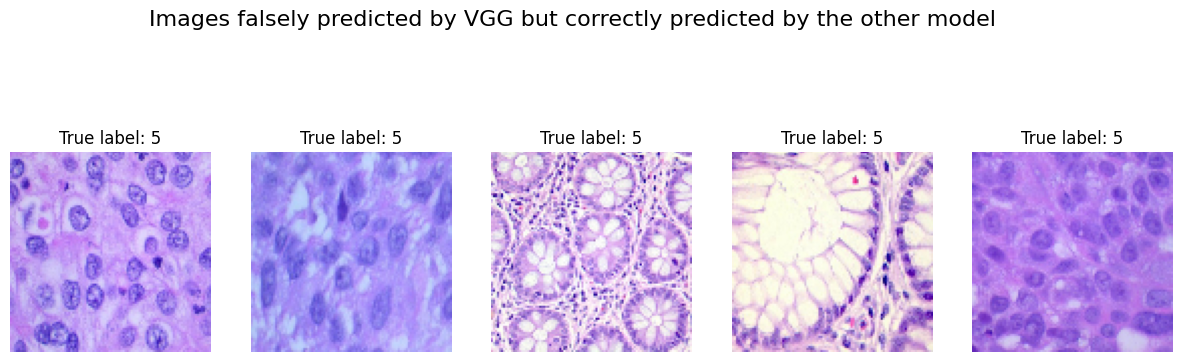

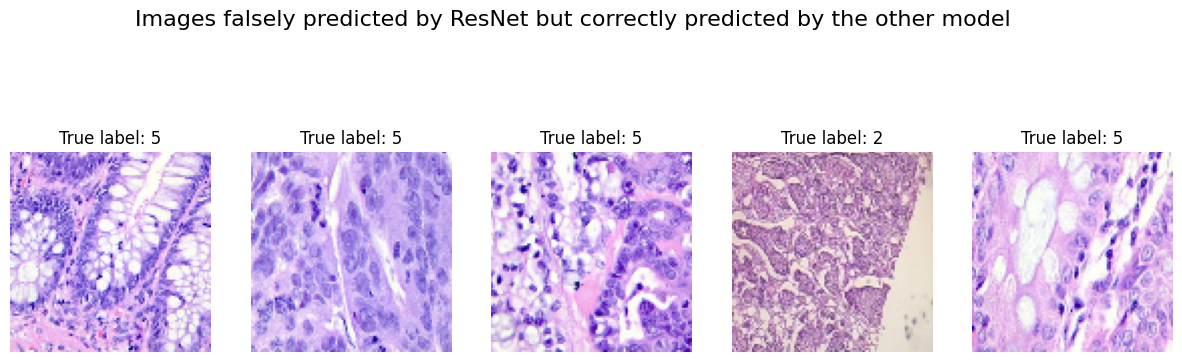

In [ ]:
import matplotlib.pyplot as plt

# Function to plot images
def plot_images(images, labels, model_name):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.title(f"True label: {labels[i]}")
        plt.axis('off')
    plt.suptitle(f"Images falsely predicted by {model_name} but correctly predicted by the other model", fontsize=16)
    plt.show()

# Plot falsely predicted images by VGG but correctly predicted by ResNet
if false_by_vgg_true_by_resnet:
    images_vgg_to_resnet, labels_vgg_to_resnet = zip(*false_by_vgg_true_by_resnet)
    plot_images(images_vgg_to_resnet[:5], labels_vgg_to_resnet[:5], "VGG")

# Plot falsely predicted images by ResNet but correctly predicted by VGG
if false_by_resnet_true_by_vgg:
    images_resnet_to_vgg, labels_resnet_to_vgg = zip(*false_by_resnet_true_by_vgg)
    plot_images(images_resnet_to_vgg[:5], labels_resnet_to_vgg[:5], "ResNet")


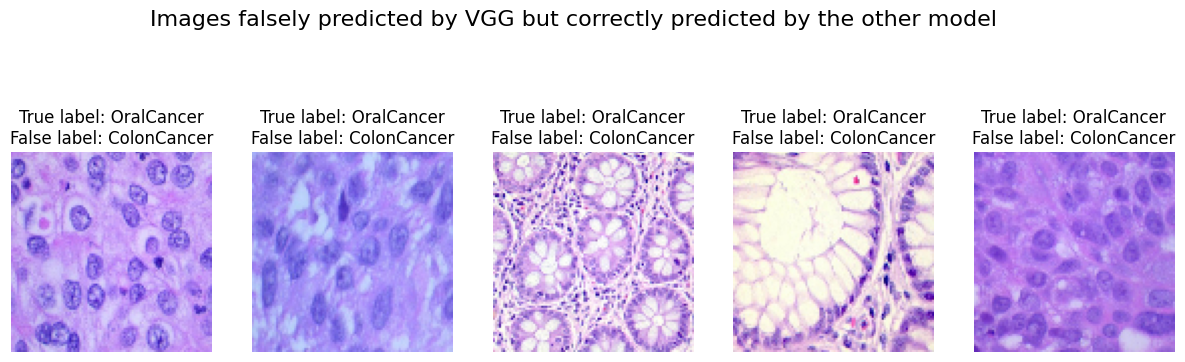

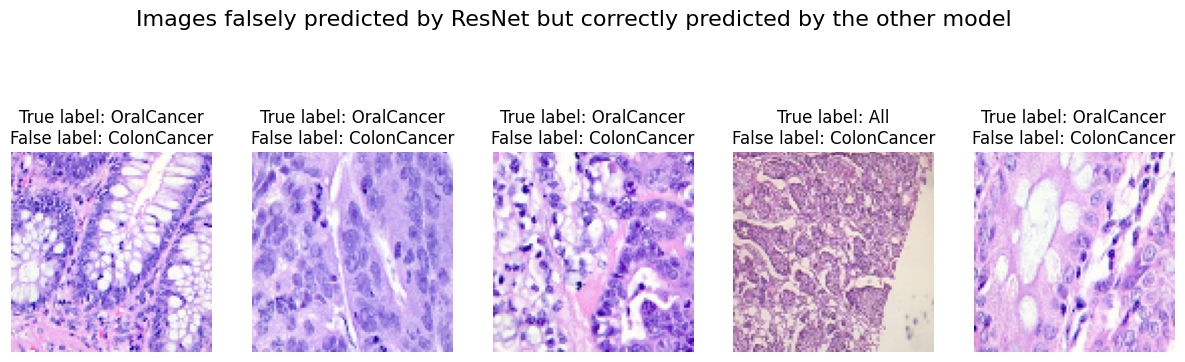

In [ ]:
import matplotlib.pyplot as plt

# Function to plot images
def plot_images(images, true_labels, false_labels, model_name):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.title(f"True label: {labels_names[int(true_labels[i])]}\nFalse label: {labels_names[int(np.argmax(false_labels[i]))]}")
        plt.axis('off')
    plt.suptitle(f"Images falsely predicted by {model_name} but correctly predicted by the other model", fontsize=16)
    plt.show()

# Plot falsely predicted images by VGG but correctly predicted by ResNet
if false_by_vgg_true_by_resnet:
    images_vgg_to_resnet, true_labels_vgg_to_resnet = zip(*false_by_vgg_true_by_resnet)
    false_labels_vgg_to_resnet = [labels_names[label] for label in true_labels_vgg_to_resnet]
    plot_images(images_vgg_to_resnet[:5], true_labels_vgg_to_resnet[:5], false_labels_vgg_to_resnet[:5], "VGG")

# Plot falsely predicted images by ResNet but correctly predicted by VGG
if false_by_resnet_true_by_vgg:
    images_resnet_to_vgg, true_labels_resnet_to_vgg = zip(*false_by_resnet_true_by_vgg)
    false_labels_resnet_to_vgg = [labels_names[label] for label in true_labels_resnet_to_vgg]
    plot_images(images_resnet_to_vgg[:5], true_labels_resnet_to_vgg[:5], false_labels_resnet_to_vgg[:5], "ResNet")


In [ ]:
labels_names_sub

array(['lung_bnt', 'cervix_koc', 'all_pre', 'all_early', 'cervix_dyk',
       'lymph_cll', 'brain_menin', 'oral_normal', 'cervix_sfi', 'all_pro',
       'kidney_normal', 'lung_scc', 'colon_aca', 'all_benign', 'lymph_fl',
       'cervix_mep', 'lung_aca', 'brain_glioma', 'colon_bnt',
       'brain_tumor', 'kidney_tumor', 'BreastMalignant', 'cervix_pab',
       'BreastBenign'], dtype=object)

In [ ]:
import matplotlib.pyplot as plt

# Function to plot images
def plot_images(images, true_labels, false_labels, model_name):
    num_images = min(len(images), 50)  # Limit to a maximum of 70 images (10 rows, 7 columns)
    num_rows = 10
    num_cols = (num_images + num_rows - 1) // num_rows  # Calculate the number of columns needed
    plt.figure(figsize=(20, 20))  # Set figure size for 10 rows and 7 columns
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {labels_names_sub[int(true_labels[i])]}\nFalse: {labels_names_sub[int(np.argmax(false_labels[i]))]}")
        plt.axis('off')
    plt.suptitle(f"Images falsely predicted by {model_name} but correctly predicted by the other model", fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot falsely predicted images by VGG but correctly predicted by ResNet
if false_by_vgg_true_by_resnet_sub:
    images_vgg_to_resnet_sub, true_labels_vgg_to_resnet_sub = zip(*false_by_vgg_true_by_resnet_sub)
    false_labels_vgg_to_resnet_sub = [labels_names_sub[label] for label in true_labels_vgg_to_resnet_sub]
    plot_images(images_vgg_to_resnet_sub, true_labels_vgg_to_resnet_sub, false_labels_vgg_to_resnet_sub, "VGG")

# Plot falsely predicted images by ResNet but correctly predicted by VGG
if false_by_resnet_true_by_vgg_sub:
    images_resnet_to_vgg_sub, true_labels_resnet_to_vgg_sub = zip(*false_by_resnet_true_by_vgg)
    false_labels_resnet_to_vgg_sub = [labels_names_sub[label] for label in true_labels_resnet_to_vgg]
    plot_images(images_resnet_to_vgg_sub, true_labels_resnet_to_vgg_sub, false_labels_resnet_to_vgg_sub, "ResNet")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import matplotlib.pyplot as plt

# Function to plot images
def plot_images(images, true_labels, false_labels, model_name):
    num_images = min(len(images), 20)  # Limit to a maximum of 50 images
    num_rows = 4
    num_cols = (num_images + num_rows - 1) // num_rows  # Calculate the number of columns needed
    plt.figure(figsize=(20, 15))  # Set figure size for 10 rows and 5 columns
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {labels_names_sub[int(true_labels[i])]}\nFalse: {labels_names_sub[int(np.argmax(false_labels[i]))]}")
        plt.axis('off')
    plt.suptitle(f"Images falsely predicted by {model_name} but correctly predicted by the other model", fontsize=16)
    plt.tight_layout(pad=3.0, h_pad=3.0, w_pad=3.0)  # Adjust padding between subplots
    plt.show()

# Plot falsely predicted images by VGG but correctly predicted by ResNet
if false_by_vgg_true_by_resnet_sub:
    images_vgg_to_resnet_sub, true_labels_vgg_to_resnet_sub = zip(*false_by_vgg_true_by_resnet_sub)
    false_labels_vgg_to_resnet_sub = [labels_names_sub[label] for label in true_labels_vgg_to_resnet_sub]
    plot_images(images_vgg_to_resnet_sub, true_labels_vgg_to_resnet_sub, false_labels_vgg_to_resnet_sub, "VGG")

# Plot falsely predicted images by ResNet but correctly predicted by VGG
if false_by_resnet_true_by_vgg_sub:
    images_resnet_to_vgg_sub, true_labels_resnet_to_vgg_sub = zip(*false_by_resnet_true_by_vgg)
    false_labels_resnet_to_vgg_sub = [labels_names_sub[label] for label in true_labels_resnet_to_vgg]
    plot_images(images_resnet_to_vgg_sub, true_labels_resnet_to_vgg_sub, false_labels_resnet_to_vgg_sub, "ResNet")


Output hidden; open in https://colab.research.google.com to view.

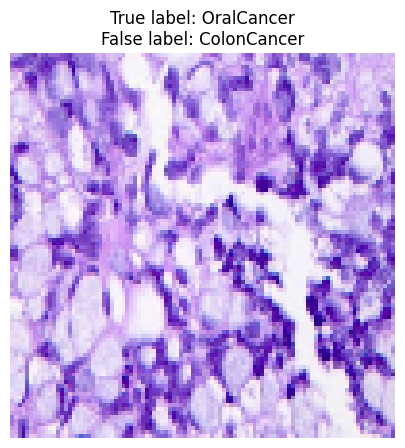

In [ ]:
def plot_images(images, true_labels, false_labels, model_name):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.title(f"True label: {labels_names[int(true_labels[i])]}\nFalse label: {labels_names[int(np.argmax(false_labels[i]))]}")
        plt.axis('off')
    #plt.suptitle(f"Images falsely predicted by {model_name} but correctly predicted by the other model", fontsize=16)
    plt.show()
# Plot falsely predicted images by both VGG and ResNet
if both_false:
    images_both_false, labels_both_false = zip(*both_false)
    plot_images(images_both_false[:5], labels_both_false[:5], labels_both_false[:5], "Both VGG and ResNet")
else:
    print("No images falsely predicted by both VGG and ResNet models.")


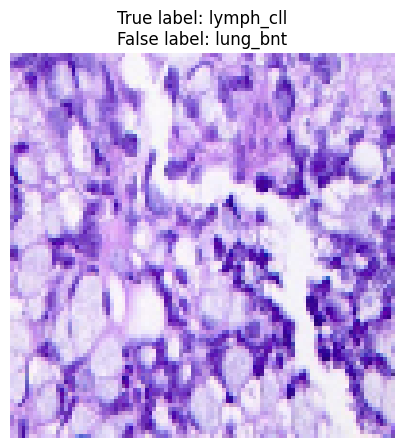

In [ ]:
def plot_images(images, true_labels, false_labels, model_name):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.title(f"True label: {labels_names_sub[int(true_labels[i])]}\nFalse label: {labels_names_sub[int(np.argmax(false_labels[i]))]}")
        plt.axis('off')
    #plt.suptitle(f"Images falsely predicted by {model_name} but correctly predicted by the other model", fontsize=16)
    plt.show()
# Plot falsely predicted images by both VGG and ResNet
if both_false:
    images_both_false, labels_both_false = zip(*both_false)
    plot_images(images_both_false[:5], labels_both_false[:5], labels_both_false[:5], "Both VGG and ResNet")
else:
    print("No images falsely predicted by both VGG and ResNet models.")


In [ ]:
import matplotlib.pyplot as plt

def plot_images(images, true_labels, predicted_labels_vgg, predicted_labels_resnet, model_name):
    num_images = min(len(images), 50)  # Ensure we plot a maximum of 50 images
    num_cols = 5
    num_rows = (num_images + num_cols - 1) // num_cols  # Calculate the number of rows needed
    plt.figure(figsize=(20, 4 * num_rows))  # Set figure size based on the number of rows
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {labels_names_sub[int(true_labels[i])]}\nFalse: {labels_names_sub[int(np.argmax(false_labels[i]))]}")
        plt.axis('off')
    plt.suptitle(f"Images falsely predicted by {model_name} but correctly predicted by the other model", fontsize=16)
    plt.tight_layout()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

def plot_images(images, true_labels, predicted_labels_vgg, predicted_labels_resnet, model_name):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.title(f"True label: {labels_names_sub[int(true_labels[i])]}\nVGG pred: {labels_names_sub[int(predicted_labels_vgg[i])]}, \nResNet pred: {labels_names_sub[int(predicted_labels_resnet[i])]}")
        plt.axis('off')
    #plt.suptitle(f"Images falsely predicted by {model_name} but correctly predicted by the other model", fontsize=16)
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

def plot_images(images, true_labels, predicted_labels_vgg, predicted_labels_resnet, model_name):
    num_images = min(len(images), 50)  # Ensure we plot a maximum of 50 images
    num_rows = (num_images + 4) // 10  # Calculate the number of rows needed for subplots
    plt.figure(figsize=(20, 2 * num_rows))  # Adjust the figure size based on the number of rows
    for i in range(num_images):
        plt.subplot(num_rows, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {labels_names_sub[int(true_labels[i])]}\nVGG: {labels_names_sub[int(predicted_labels_vgg[i])]}, ResNet: {labels_names_sub[int(predicted_labels_resnet[i])]}")
        plt.axis('off')
    #plt.suptitle(f"Images falsely predicted by {model_name} but correctly predicted by the other model", fontsize=16)
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

def plot_images(images, true_labels, predicted_labels_vgg, predicted_labels_resnet, model_name):
    num_images = min(len(images), 50)  # Ensure we plot a maximum of 50 images
    num_cols = 5
    num_rows = (num_images + num_cols - 1) // num_cols  # Calculate the number of rows needed
    plt.figure(figsize=(20, 4 * num_rows))  # Set figure size based on the number of rows
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {labels_names_sub[int(true_labels[i])]}\nVGG: {labels_names_sub[int(predicted_labels_vgg[i])]}, ResNet: {labels_names_sub[int(predicted_labels_resnet[i])]}")
        plt.axis('off')
    plt.suptitle(f"Images falsely predicted by {model_name} but correctly predicted by the other model", fontsize=16)
    plt.tight_layout()
    plt.show()


In [ ]:
# Plot falsely predicted images by both VGG and ResNet
if both_false:
    images_both_false, true_labels_both_false = zip(*both_false_sub)
    plot_images(images_both_false[:50], true_labels_both_false[:50], predicted_labels_vgg[:50], predicted_labels_resnet[:50], "Both VGG and ResNet")
else:
    print("No images falsely predicted by both VGG and ResNet models.")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot images
def plot_images(images, true_labels, predicted_labels, true_label_names, predicted_label_names, model_name):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        true_label_name = true_label_names[true_labels[i]]
        predicted_label_name = predicted_label_names[predicted_labels[i]]
        plt.title(f"True label: {true_label_name}\nPredicted label: {predicted_label_name}")
        plt.axis('off')
    plt.suptitle(f"Images falsely predicted by {model_name} but correctly predicted by the other model", fontsize=16)
    plt.show()

# Load the models
vgg_model = tf.keras.models.load_model('/content/drive/MyDrive/Multicancer/vgg_best_model(3).h5')
resnet_model = tf.keras.models.load_model('/content/drive/MyDrive/Multicancer/resnet50_best_model.h5')

# Extract label names from the generator


# Initialize lists to store results
false_by_vgg_true_by_resnet = []
false_by_resnet_true_by_vgg = []

# Iterate over your test Generator to generate predictions
for i in range(len(test_Generator)):
    X, [y_main, _] = test_Generator[i]  # Assuming the second section is not needed

    # Predictions by VGG model
    predictions_vgg = vgg_model.predict(X)
    predicted_labels_vgg = np.argmax(predictions_vgg[0], axis=1)  # Considering only y_main

    # Predictions by ResNet model
    predictions_resnet = resnet_model.predict(X)
    predicted_labels_resnet = np.argmax(predictions_resnet[0], axis=1)  # Considering only y_main

    # Compare predictions
    for j in range(len(X)):
        true_label = np.argmax(y_main[j])
        if predicted_labels_vgg[j] != true_label and predicted_labels_resnet[j] == true_label:
            false_by_vgg_true_by_resnet.append((X[j], true_label))  # Falsely predicted by VGG, correctly predicted by ResNet
        elif predicted_labels_resnet[j] != true_label and predicted_labels_vgg[j] == true_label:
            false_by_resnet_true_by_vgg.append((X[j], true_label))  # Falsely predicted by ResNet, correctly predicted by VGG

# Convert lists to numpy arrays for easier manipulation


AttributeError: 'CancerImageDataGenerator' object has no attribute 'class_indices'

In [ ]:
# Plot the images falsely predicted by both VGG and ResNet models
def plot_images(images, true_labels, predicted_labels, true_label_names, predicted_label_names, model_name):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        true_label_name = true_label_names[true_labels[i]]
        predicted_label_name = predicted_label_names[predicted_labels[i]]
        plt.title(f"True label: {true_label_name}\nPredicted label: {predicted_label_name}")
        plt.axis('off')

    plt.show()
if both_false:
    images_both_false, labels_both_false = zip(*both_false)
    plot_images(images_both_false[:5], labels_both_false[:5], "Both VGG and ResNet", label_names)
else:
    print("No images falsely predicted by both VGG and ResNet models.")


TypeError: plot_images() missing 2 required positional arguments: 'predicted_label_names' and 'model_name'

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your pre-trained model (make sure to adjust the model loading code)
model = tf.keras.models.load_model('/content/drive/MyDrive/Multicancer/vgg_best_model(3).h5')

# Initialize lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Iterate over your test Generator to generate predictions
for i in range(len(test_Generator)):
    X, [y_main, y_sub] = test_Generator[i]
    # Replace [y_main, y_sub] with the appropriate output from your model.
    # If your model returns a list of predictions, modify this part accordingly.
    predictions = model.predict(X)
    # Convert predicted probabilities into class labels
    predicted_main = np.argmax(predictions[0], axis=1)
    predicted_sub = np.argmax(predictions[1], axis=1)
    # Append true and predicted labels to the lists
    true_labels.extend(np.argmax(y_main, axis=1))
    predicted_labels.extend(predicted_main)

# Create the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


NameError: name 'tf' is not defined

In [ ]:
images_both_false, labels_both_false = zip(*both_false)


(100, 100, 3)

7/7 [==============================] - 2s 368ms/step


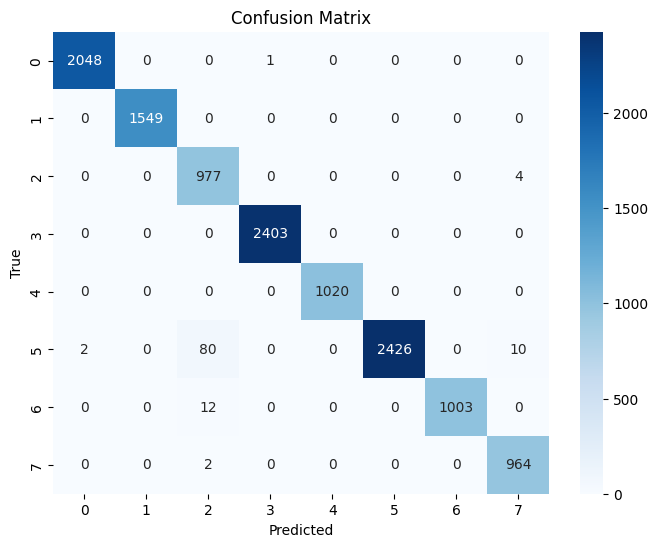

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your pre-trained model (make sure to adjust the model loading code)
model = tf.keras.models.load_model('/content/drive/MyDrive/Multicancer/vgg_best_model(3).h5')

# Initialize lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Iterate over your test Generator to generate predictions
for i in range(len(test_Generator)):
    X, [y_main, y_sub] = test_Generator[i]
    # Replace [y_main, y_sub] with the appropriate output from your model.
    # If your model returns a list of predictions, modify this part accordingly.
    predictions = model.predict(X)
    # Convert predicted probabilities into class labels
    predicted_main = np.argmax(predictions[0], axis=1)
    predicted_sub = np.argmax(predictions[1], axis=1)
    # Append true and predicted labels to the lists
    true_labels.extend(np.argmax(y_main, axis=1))
    predicted_labels.extend(predicted_main)

# Create the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


7/7 [==============================] - 0s 28ms/step


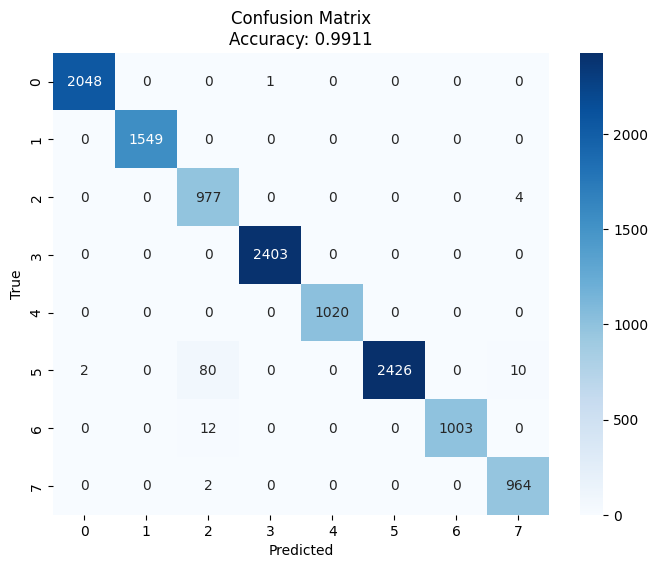

Accuracy: 0.9911


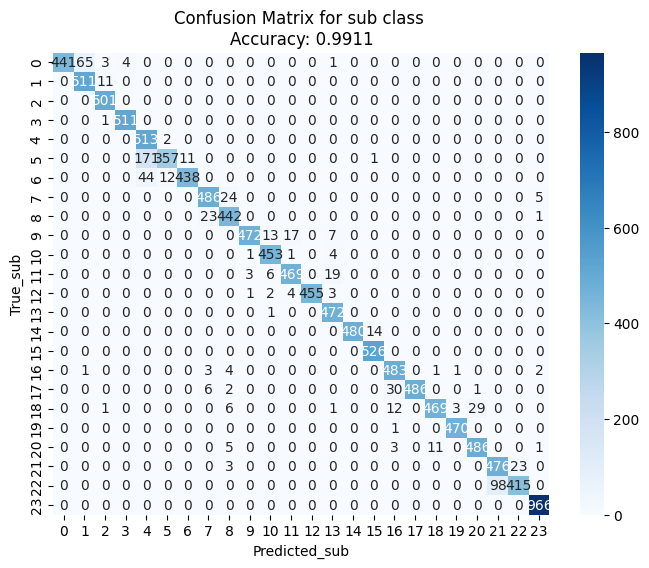

Accuracy: 0.9911


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your pre-trained model (make sure to adjust the model loading code)
model = tf.keras.models.load_model('/content/drive/MyDrive/Multicancer/vgg_best_model(3).h5')

# Initialize lists to store true and predicted labels
true_labels = []
predicted_labels = []
true_labels_sub=[]
predicted_labels_sub=[]

# Iterate over your test Generator to generate predictions
for i in range(len(test_Generator)):
    X, [y_main, y_sub] = test_Generator[i]
    # Replace [y_main, y_sub] with the appropriate output from your model.
    # If your model returns a list of predictions, modify this part accordingly.
    predictions = model.predict(X)
    # Convert predicted probabilities into class labels
    predicted_main = np.argmax(predictions[0], axis=1)
    predicted_sub = np.argmax(predictions[1], axis=1)
    # Append true and predicted labels to the lists
    true_labels.extend(np.argmax(y_main, axis=1))
    predicted_labels.extend(predicted_main)
    true_labels_sub.extend(np.argmax(y_sub,axis=1))
    predicted_labels_sub.extend(predicted_sub)


# Create the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)
confusion_sub=confusion_matrix(true_labels_sub,predicted_labels_sub)

# Calculate accuracy
accuracy = np.sum(np.diag(confusion)) / np.sum(confusion)
accuracy_sub=np.sum(np.diag(confusion_sub))/np.sum(confusion_sub)


# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.4f}')
plt.show()

print(f'Accuracy: {accuracy:.4f}')







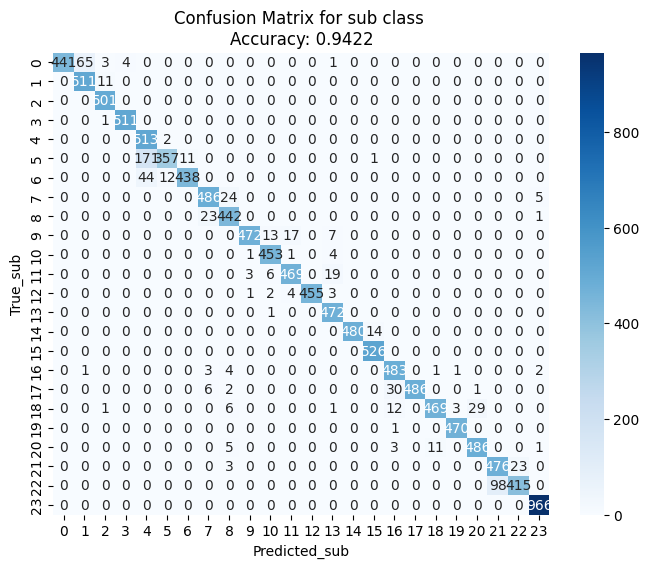

Accuracy: 0.9422


In [ ]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_sub, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted_sub')
plt.ylabel('True_sub')
plt.title(f'Confusion Matrix for sub class \nAccuracy: {accuracy_sub:.4f}')
plt.show()

print(f'Accuracy: {accuracy_sub:.4f}')

7/7 [==============================] - 0s 30ms/step


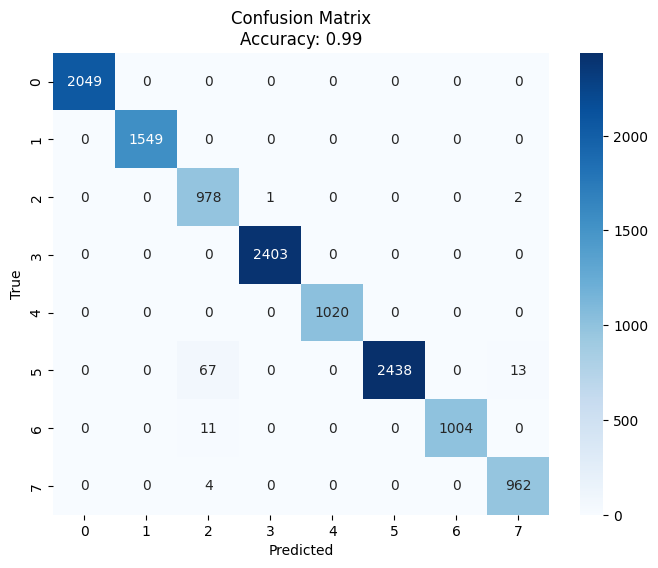

Accuracy: 0.99


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Load your pre-trained model (adjust the model loading code as needed)
model = tf.keras.models.load_model('/content/drive/MyDrive/Multicancer/vgg_best_model(3).h5')

# Initialize lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Iterate over your test Generator to generate predictions
for i in range(len(test_Generator)):
    X, [y_main, y_sub] = test_Generator[i]
    # Replace [y_main, y_sub] with the appropriate output from your model.
    # If your model returns a list of predictions, modify this part accordingly.
    predictions = model.predict(X)
    # Convert predicted probabilities into class labels
    predicted_main = np.argmax(predictions[0], axis=1)
    predicted_sub = np.argmax(predictions[1], axis=1)
    # Append true and predicted labels to the lists
    true_labels.extend(np.argmax(y_main, axis=1))
    predicted_labels.extend(predicted_main)

# Create the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Calculate accuracy
accuracy = np.sum(np.diag(confusion)) / np.sum(confusion)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.show()

print(f'Accuracy: {accuracy:.2f}')



In [ ]:
list(combined.main_class.unique())

['OralCancer',
 'Lymphoma',
 'BrainCancer',
 'ColonCancer',
 'KidneyCancer',
 'CervicalCancer',
 'All',
 'BreastCancer']

7/7 [==============================] - 0s 30ms/step


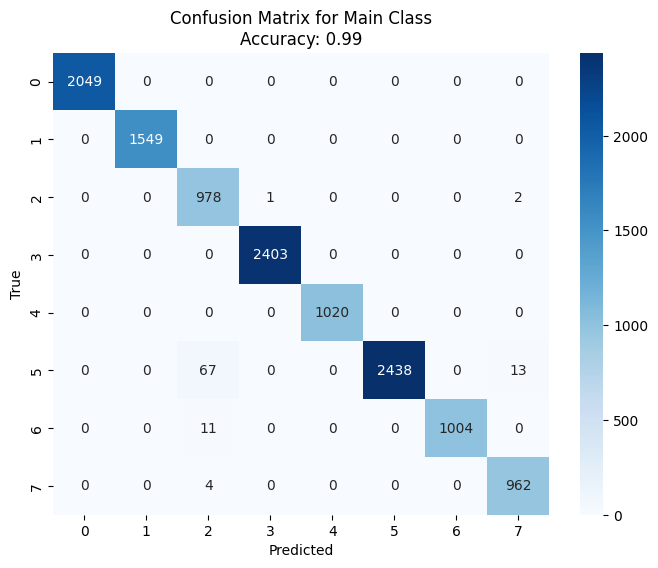

Accuracy: 0.99


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your pre-trained model (make sure to adjust the model loading code)
model = tf.keras.models.load_model('/content/drive/MyDrive/Multicancer/vgg_best_model(3).h5')

# Define your class labels as a list
class_labels = ['OralCancer', 'Lymphoma', 'BrainCancer', 'ColonCancer', 'KidneyCancer', 'CervicalCancer', 'All', 'BreastCancer']

# Initialize lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Iterate over your test Generator to generate predictions
for i in range(len(test_Generator)):
    X, [y_main, y_sub] = test_Generator[i]
    # Replace [y_main, y_sub] with the appropriate output from your model.
    # If your model returns a list of predictions, modify this part accordingly.
    predictions = model.predict(X)
    # Convert predicted probabilities into class labels
    predicted_main = [class_labels[i] for i in np.argmax(predictions[0], axis=1)]
    # Append true and predicted labels to the lists
    true_labels.extend([class_labels[i] for i in np.argmax(y_main, axis=1)])
    predicted_labels.extend(predicted_main)

# Create the confusion matrix with class labels
confusion = confusion_matrix(true_labels, predicted_labels, labels=class_labels)

# Calculate accuracy
accuracy = np.sum(np.diag(confusion)) / np.sum(confusion)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for Main Class\nAccuracy: {accuracy:.2f}')
plt.savefig('confusion matrix for main class.png')

plt.show()

print(f'Accuracy: {accuracy:.2f}')



7/7 [==============================] - 0s 30ms/step


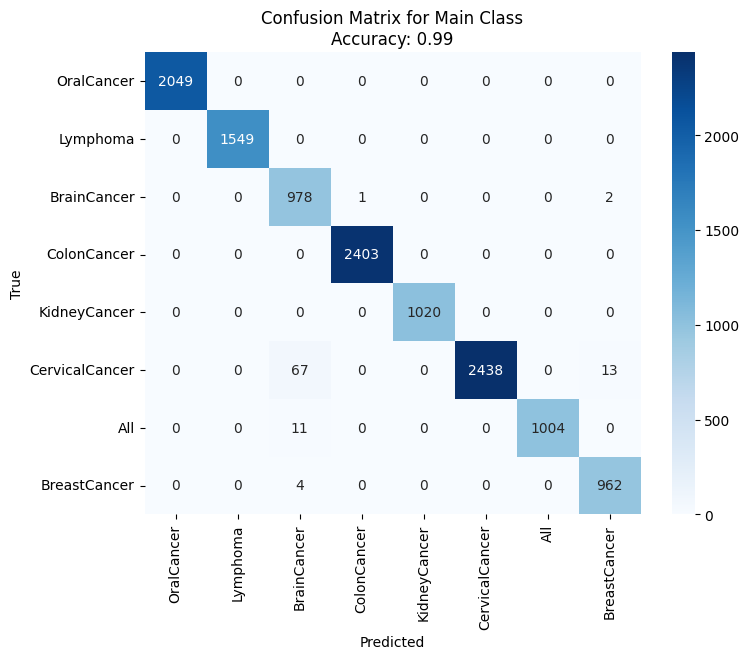

Accuracy: 0.99


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your pre-trained model (make sure to adjust the model loading code)
model = tf.keras.models.load_model('/content/drive/MyDrive/Multicancer/vgg_best_model(3).h5')

# Define your class labels as a list
class_labels = ['OralCancer', 'Lymphoma', 'BrainCancer', 'ColonCancer', 'KidneyCancer', 'CervicalCancer', 'All', 'BreastCancer']

# Initialize lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Iterate over your test Generator to generate predictions
for i in range(len(test_Generator)):
    X, [y_main, y_sub] = test_Generator[i]
    # Replace [y_main, y_sub] with the appropriate output from your model.
    # If your model returns a list of predictions, modify this part accordingly.
    predictions = model.predict(X)
    # Convert predicted probabilities into class labels
    predicted_main = [class_labels[i] for i in np.argmax(predictions[0], axis=1)]
    # Append true and predicted labels to the lists
    true_labels.extend([class_labels[i] for i in np.argmax(y_main, axis=1)])
    predicted_labels.extend(predicted_main)

# Create the confusion matrix with class labels
confusion = confusion_matrix(true_labels, predicted_labels, labels=class_labels)

# Calculate accuracy
accuracy = np.sum(np.diag(confusion)) / np.sum(confusion)

# Visualize the confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for Main Class\nAccuracy: {accuracy:.2f}')
plt.savefig('confusion_matrix_for_main_class.png')
plt.show()

print(f'Accuracy: {accuracy:.2f}')


In [ ]:
sensitivity = np.diag(confusion) / np.sum(confusion, axis=1)
sensitivity

array([1.        , 1.        , 0.9969419 , 1.        , 1.        ,
       0.96822875, 0.98916256, 0.99585921])

In [ ]:
specificity = np.diag(confusion) / np.sum(confusion, axis=0)
specificity

array([1.        , 1.        , 0.92264151, 0.99958403, 1.        ,
       1.        , 1.        , 0.98464688])

In [ ]:
precision = np.diag(confusion) / np.sum(confusion, axis=0)
precision

array([1.        , 1.        , 0.92264151, 0.99958403, 1.        ,
       1.        , 1.        , 0.98464688])

In [ ]:
precision = np.diag(confusion) / np.sum(confusion, axis=0)
precision

array([1.        , 1.        , 0.92264151, 0.99958403, 1.        ,
       1.        , 1.        , 0.98464688])

In [ ]:
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
f1_score

array([1.        , 1.        , 0.95835375, 0.99979197, 1.        ,
       0.98385795, 0.99455176, 0.99022131])

In [ ]:
mcc = (confusion.diagonal() * np.sum(confusion, axis=1) - np.sum(confusion, axis=0) * np.sum(confusion, axis=1)) / np.sqrt(
    (np.sum(confusion, axis=0) * np.sum(confusion, axis=1) * np.sum(confusion, axis=1) * np.sum(confusion, axis=0)))
mcc

array([ 0.        ,  0.        , -0.07735849, -0.00041597,  0.        ,
        0.        ,  0.        , -0.01535312])

In [ ]:
# Evaluate the model and capture the tuple with loss and accuracy
loss_and_accuracy = vggmodel.evaluate(test_Generator)

# Unpack the tuple to get the loss and accuracy


49/49 [==============================] - 82s 1s/step - loss: 0.1861 - dense_14_loss: 0.0263 - dense_15_loss: 0.1598 - dense_14_accuracy: 0.9911 - dense_15_accuracy: 0.9422


ValueError: too many values to unpack (expected 2)

In [ ]:
_,_,_, maintest_accuracy ,subtest_accuracy= loss_and_accuracy

print(f'main acc: {maintest_accuracy}')
print(f'sub Test Accuracy: {subtest_accuracy}')

main acc: 0.9921606183052063
sub Test Accuracy: 0.9439244866371155


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Generate predictions
predictions = vggmodel.predict(test_Generator)

# Get true main class and sub-class labels from the test data generator
true_main_class_labels, true_sub_class_labels = [], []
for i in range(len(test_Generator)):
    _, labels = test_Generator[i]
    true_main_class_labels.extend(labels[0])  # Assuming main class labels are the first set
    true_sub_class_labels.extend(labels[1])    # Assuming sub-class labels are the second set



49/49 [==============================] - 63s 1s/step


In [ ]:
predicted_main_class_labels = np.argmax(predictions[0], axis=1)
predicted_sub_class_labels = np.argmax(predictions[1], axis=1)

In [ ]:
true_main_class_labels = np.argmax(true_main_class_labels, axis=1)
true_sub_class_labels = np.argmax(true_sub_class_labels, axis=1)

In [ ]:
confusion_main_class = confusion_matrix(true_main_class_labels, predicted_main_class_labels)
accuracy_main_class = accuracy_score(true_main_class_labels, predicted_main_class_labels)

In [ ]:
confusion_sub_class = confusion_matrix(true_sub_class_labels, predicted_sub_class_labels)
accuracy_sub_class = accuracy_score(true_sub_class_labels, predicted_sub_class_labels)

In [ ]:
print(f'Confusion Matrix for Main Class:\n{confusion_main_class}')
print(f'Accuracy for Main Class: {accuracy_main_class}')

Confusion Matrix for Main Class:
[[360 246 174 407 164 405 147 146]
 [246 193 102 307 130 309 134 128]
 [153 124  62 204  89 212  73  64]
 [392 293 207 461 199 467 192 192]
 [172 123  89 184  81 200  81  90]
 [409 321 186 456 203 540 205 198]
 [144 126  89 187  95 202 104  68]
 [173 123  68 197  59 185  82  79]]
Accuracy for Main Class: 0.150387968962483


In [ ]:
# Extract the class predictions for both main class and sub-class
# Assuming that the labels are in one-hot encoded format


# Decode the one-hot encoded true labels to obtain the actual class labels


# Compute confusion matrices and accuracy for main class and sub-class






print(f'Confusion Matrix for Sub Class:\n{confusion_sub_class}')
print(f'Accuracy for Sub Class: {accuracy_sub_class}')


Confusion Matrix for Sub Class:
[[24 21 26 25 27 22 21 19 21 10 16 21 15 26 25 24 20 22 19 22 23 15 14 36]
 [17 19 17 23 21 18 19 24 21 29 21 18 25 17 22 19 19 22 27 18 21 20 21 44]
 [23 30 26 18 19 16 20 22 22 28 17 24 20 19 15 15 19 25 14 18 18 12 24 37]
 [30 19 18 24 27 16 20 22 23 22 14 24 19 22 23 21 16 15 16 25 25 22 20 29]
 [22 18 24 16 18 18 24 17 20 22 15 16 21 17 15 25 25 22 20 21 21 27 26 45]
 [24 26 21 18 33 25 15 14 20 24 25 25 22 25 21 21 17 24 14 21 20 21 20 44]
 [20 23 17 17 15 27 18 17 14 25 16 20 16 18 23 25 25 23 17 19 20 23 16 40]
 [13 29 14 26 25 23 19 16 15 20 15 22 20 25 31 22 17 24 26 13 32 22 13 33]
 [19 14 26 12 20 19 18 19 12 25 18 24 19 15 23 13 21 21 22 15 21 20 18 32]
 [26 15 22 24 22 13 23 25 23 17 13 23 16 16 19 28 15 21 21 15 19 27 23 43]
 [17 16 21 22 20 17 23 15 21 17 21 13 20 19 22 17 13 30 16 16 12 19 15 37]
 [19 20 16 21 14 27 24 21 21 24 25 16 15 17 19 20 15 22 15 19 20 18 21 48]
 [16 23 20 22 18 23 15 25 15 27 15 20 15 14 18 22 17 21 17 20 19 19 

In [ ]:
# def load_and_preprocess_image(image_path, image_size):
#     # Load and preprocess the image using your preferred image processing library (e.g., PIL, OpenCV)
#     # You may need to resize, normalize, and perform other preprocessing steps.
#     # Here's a simple example using TensorFlow and tf.image:
#     image = tf.io.read_file(image_path)
#     image = tf.image.decode_jpeg(image, channels=3)
#     image = tf.image.resize(image, image_size)
#     image = tf.image.convert_image_dtype(image, tf.float32)
#     image = image / 255.0  # Normalize to [0, 1]
#     return image

# # Create a function to generate t-SNE data
# def generate_tsne_data(data, class_column, num_samples, perplexity=30, n_iter=300):
#     selected_indices = random.sample(range(len(data)), num_samples)
#     selected_data = data.iloc[selected_indices]

#     image_data = []
#     labels = selected_data[class_column]

#     for _, row in selected_data.iterrows():
#         image_data.append(load_and_preprocess_image(row['image_path'], (100, 100)))

#     image_data = np.array(image_data).reshape(len(image_data), -1)

#     tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter)
#     tsne_result = tsne.fit_transform(image_data)

#     return tsne_result, labels


In [ ]:
# num_samples = 500  # Number of samples to visualize
# main_tsne_result, main_labels = generate_tsne_data(df, 'main_class', num_samples)
# plt.figure(figsize=(8, 8))
# plt.scatter(main_tsne_result[:, 0], main_tsne_result[:, 1], alpha=0.6)
# plt.title('t-SNE Plot for Main Classes')
# plt.show()

# # Plot t-SNE visualization for sub classes
# sub_tsne_result, sub_labels = generate_tsne_data(df, 'sub_class', num_samples)
# plt.figure(figsize=(8, 8))
# plt.scatter(sub_tsne_result[:, 0], sub_tsne_result[:, 1], alpha=0.6)
# plt.title('t-SNE Plot for Sub Classes')
# plt.show()

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# import random
# import tensorflow as tf

# # Load the CSV file (change 'combined.csv' to your CSV file)


# # Randomly select 500 images from the dataset
# sample_size = 500
# df_sampled = df.sample(sample_size, random_state=42)

# # Load a pre-trained model (e.g., MobileNetV2) for feature extraction
# base_model = tf.keras.applications.MobileNetV2(input_shape=(100, 100, 3), include_top=False, weights='imagenet')

# # Create a function to preprocess and extract features
# def extract_features(image_path):
#     image = load_and_preprocess_image(image_path, (100, 100))
#     image = tf.expand_dims(image, axis=0)  # Add a batch dimension
#     features = base_model.predict(image)
#     features = tf.keras.layers.GlobalAveragePooling2D()(features)  # Global Average Pooling to reduce dimensionality
#     return features.numpy()

# # Create a list of image features and class labels for the sampled images
# image_features = [extract_features(image_path) for image_path in df_sampled['image_path']]
# class_labels = df_sampled['main_class']  # Change to 'sub_class' if needed

# # Perform t-SNE on the image features
# tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
# tsne_result = tsne.fit_transform(image_features)

# # Plot t-SNE visualization with class labels for the sampled images
# plt.figure(figsize=(8, 8))
# plt.title('t-SNE Plot with Class Labels (500 Random Samples)')
# unique_labels = class_labels.unique()

# # Assign unique colors to each class label
# colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

# for i, label in enumerate(unique_labels):
#     indices = class_labels[class_labels == label].index
#     class_tsne_result = tsne_result[indices]
#     plt.scatter(class_tsne_result[:, 0], class_tsne_result[:, 1], label=label, color=colors[i])

# plt.legend()
# plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import random
import cv2

# Load the CSV file
data = combined

# Randomly select 100 images
random.seed(42)  # Set a seed for reproducibility
sample_data = data.sample(n=1000)

# Load and preprocess the images
image_data = []
for image_path in sample_data['image_path']:
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale if needed
    img = cv2.resize(img, (64, 64))  # Resize the image to a common size
    img = img.flatten()  # Flatten the image into a 1D array
    image_data.append(img)

# Convert the list of flattened images into a NumPy array
image_data = np.array(image_data)

# Apply t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
tsne_results = tsne.fit_transform(image_data)

# Standardize the t-SNE results for better visualization
tsne_results = StandardScaler().fit_transform(tsne_results)

# Create a DataFrame for the t-SNE results and main classes
tsne_df = pd.DataFrame(data={'tsne_1': tsne_results[:, 0], 'tsne_2': tsne_results[:, 1], 'main_class': sample_data['main_class']})

# Define a list of unique main classes
unique_classes = tsne_df['main_class'].unique()

# Create a color map for the classes
color_map = plt.cm.get_cmap('tab20', len(unique_classes))

# Create a scatter plot with different colors for each class
plt.figure(figsize=(10, 8))
for i, main_class in enumerate(unique_classes):
    class_data = tsne_df[tsne_df['main_class'] == main_class]
    plt.scatter(class_data['tsne_1'], class_data['tsne_2'], label=main_class, c=[color_map(i)], s=30)

plt.legend()
plt.title('t-SNE Visualization of Random 1000 Images')
plt.savefig('tsne_image1.png')
plt.xlabel('tsne-1')
plt.ylabel('tsne-2')
plt.show()


NameError: ignored

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.manifold import TSNE
# from sklearn.preprocessing import StandardScaler
# import random
# import cv2

# # Load the CSV file
# data = oral

# # Randomly select 100 images
# random.seed(42)  # Set a seed for reproducibility
# sample_data = data.sample(n=1000)

# # Load and preprocess the images
# image_data = []
# for image_path in sample_data['image_path']:
#     img = cv2.imread(image_path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale if needed
#     img = cv2.resize(img, (64, 64))  # Resize the image to a common size
#     img = img.flatten()  # Flatten the image into a 1D array
#     image_data.append(img)

# # Convert the list of flattened images into a NumPy array
# image_data = np.array(image_data)

# # Apply t-SNE to reduce dimensionality
# tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
# tsne_results = tsne.fit_transform(image_data)

# # Standardize the t-SNE results for better visualization
# tsne_results = StandardScaler().fit_transform(tsne_results)

# # Create a DataFrame for the t-SNE results and main classes
# tsne_df = pd.DataFrame(data={'tsne_1': tsne_results[:, 0], 'tsne_2': tsne_results[:, 1], 'sub_class': sample_data['sub_class']})

# # Define a list of unique main classes
# unique_classes = tsne_df['sub_class'].unique()

# # Create a color map for the classes
# color_map = plt.cm.get_cmap('tab20', len(unique_classes))

# # Create a scatter plot with different colors for each class
# plt.figure(figsize=(10, 8))
# for i, main_class in enumerate(unique_classes):
#     class_data = tsne_df[tsne_df['sub_class'] == main_class]
#     plt.scatter(class_data['tsne_1'], class_data['tsne_2'], label=main_class, c=[color_map(i)], s=30)

# plt.legend()
# plt.title('t-SNE Visualization of Random 1000 Images for oral cancer')
# plt.savefig('tsne_sub_image1_oral.png')
# plt.xlabel('tsne-1')
# plt.ylabel('tsne-2')
# plt.show()


In [ ]:
!pip install networkx matplotlib


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
G = nx.Graph()


In [ ]:
# Example: Adding 500 nodes (images)
for image_id in range(1, 501):
    G.add_node(image_id)

# Example: Creating edges (connections) between images
G.add_edge(1, 2)
G.add_edge(2, 3)
# Add your logic for creating connections based on your dataset


In [ ]:
!pip install networkx matplotlib pandas
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random
# Load the CSV file
data = combined

# Randomly select 100 images
random.seed(42)  # Set a seed for reproducibility
sample_data = data.sample(n=1000)
G = nx.Graph()

# Add nodes for each image
for index, row in sample_data.iterrows():
    G.add_node(row['image_path'], main_class=row['main_class'])

# Create edges between images of the same class
for main_class in sample_data['main_class'].unique():
    images_in_class = sample_data[sample_data['main_class'] == main_class]
    image_paths = images_in_class['image_path'].tolist()
    for i in range(len(image_paths)):
        for j in range(i + 1, len(image_paths)):
            G.add_edge(image_paths[i], image_paths[j])
# Define node colors based on main_class
node_colors = [sample_data[sample_data['image_path'] == node]['main_class'].values[0] for node in G.nodes]

# Visualize the graph
class_labels = sample_data['main_class'].unique()
label_to_int = {label: i for i, label in enumerate(class_labels)}
int_labels = [label_to_int[label] for label in sample_data['main_class']]

# Visualize the graph with integer labels as colors
pos = nx.spring_layout(G)  # Define a layout for the nodes
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=False, node_size=20, node_color=int_labels, cmap=plt.get_cmap('tab20', len(class_labels)))
plt.title('Network Graph of 100 Random Images')
plt.show()




In [ ]:
# Visualize the graph with integer labels as colors and class names as labels

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random
# Load the CSV file
data = combined

# Randomly select 100 images
random.seed(42)  # Set a seed for reproducibility
sample_data = data.sample(n=1000)
G = nx.Graph()

# Add nodes for each image
for index, row in sample_data.iterrows():
    G.add_node(row['image_path'], main_class=row['main_class'])

# Create edges between images of the same class
for main_class in sample_data['main_class'].unique():
    images_in_class = sample_data[sample_data['main_class'] == main_class]
    image_paths = images_in_class['image_path'].tolist()
    for i in range(len(image_paths)):
        for j in range(i + 1, len(image_paths)):
            G.add_edge(image_paths[i], image_paths[j])
# Define node colors based on main_class
node_colors = [sample_data[sample_data['image_path'] == node]['main_class'].values[0] for node in G.nodes]

# Visualize the graph
class_labels = sample_data['main_class'].unique()
label_to_int = {label: i for i, label in enumerate(class_labels)}
int_labels = [label_to_int[label] for label in sample_data['main_class']]
pos = nx.spring_layout(G)  # Define a layout for the nodes
plt.figure(figsize=(10, 8))
node_colors = int_labels  # Use integer labels as colors
cmap = plt.get_cmap('tab20', len(class_labels))
nx.draw(G, pos, with_labels=True, labels={node: label for node, label in zip(G.nodes, sample_data['main_class'])}, node_size=20, node_color=node_colors, cmap=cmap)
plt.title('Network Graph of 100 Random Images')
plt.show()


In [ ]:
# Visualize the graph with different colors for each class and class names as labels
pos = nx.spring_layout(G)  # Define a layout for the nodes
plt.figure(figsize=(10, 8))

# Create a color map for the classes
color_map = plt.get_cmap('tab20', len(class_labels))

# Assign unique colors to each class and create a dictionary to map class names to colors
class_colors = {class_name: color_map(i) for i, class_name in enumerate(class_labels)}

# Map class names to colors for each node
node_colors = [class_colors[sample_data[sample_data['image_path'] == node]['main_class'].values[0]] for node in G.nodes]

# Draw the graph with labels and colored nodes
nx.draw(G, pos, with_labels=True, labels={node: label for node, label in zip(G.nodes, sample_data['main_class'])}, node_size=20, node_color=node_colors)
plt.title('Network Graph of 100 Random Images')
plt.show()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random

# Load the CSV file
data = combined

# Randomly select 100 images
random.seed(42)  # Set a seed for reproducibility
sample_data = data.sample(n=1000)
G = nx.Graph()

# Add nodes for each image
for index, row in sample_data.iterrows():
    G.add_node(row['image_path'], main_class=row['main_class'])

# Create edges between images of the same class
for main_class in sample_data['main_class'].unique():
    images_in_class = sample_data[sample_data['main_class'] == main_class]
    image_paths = images_in_class['image_path'].tolist()
    for i in range(len(image_paths)):
        for j in range(i + 1, len(image_paths)):
            G.add_edge(image_paths[i], image_paths[j])


# Define node colors based on main_class
node_colors = [sample_data[sample_data['image_path'] == node]['main_class'].values[0] for node in G.nodes]

# Visualize the graph
class_labels = sample_data['main_class'].unique()
label_to_int = {label: i for i, label in enumerate(class_labels)}
int_labels = [label_to_int[label] for label in sample_data['main_class']]
pos = nx.spring_layout(G)  # Define a layout for the nodes
plt.figure(figsize=(10, 8))

# Use integer labels as colors
cmap = plt.get_cmap('tab20', len(class_labels))
nx.draw(G, pos, with_labels=False, node_size=20, node_color=int_labels, cmap=cmap)

# Create a legend
legend_labels = {i: label for i, label in enumerate(class_labels)}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[i], markersize=10, markerfacecolor=cmap(i)) for i in range(len(class_labels))]
plt.legend(handles=legend_handles, title="Class Labels", loc='upper right')

plt.title('Network Graph of 100 Random Images')
plt.show()


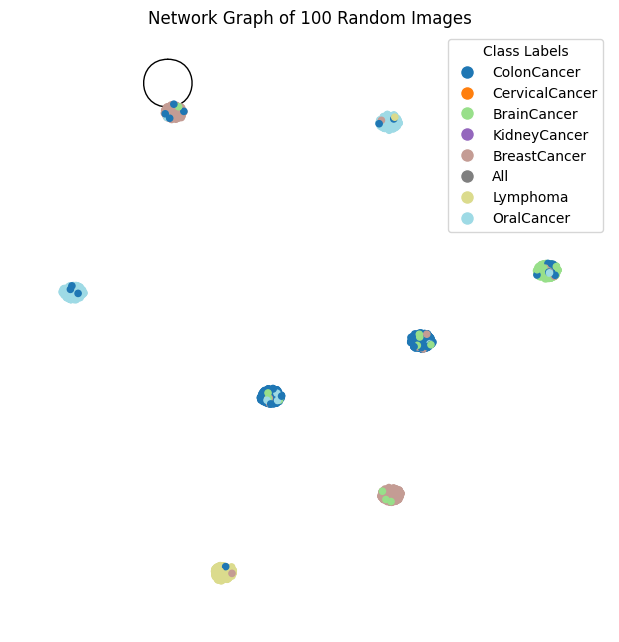

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random

# Load the CSV file (replace 'your_dataset.csv' with the actual path)
data = combined

# Randomly select 100 images
random.seed(42)  # Set a seed for reproducibility
sample_data = data.sample(n=1000)

G = nx.Graph()

# Add nodes for each image
for index, row in sample_data.iterrows():
    G.add_node(row['image_path'], main_class=row['main_class'])

# Create edges between images of the same class
for main_class in sample_data['main_class'].unique():
    images_in_class = sample_data[sample_data['main_class'] == main_class]
    image_paths = images_in_class['image_path'].tolist()
    for i in range(len(image_paths)):
        for j in range(i + 1, len(image_paths)):
            G.add_edge(image_paths[i], image_paths[j])

# Define node colors based on main_class
node_colors = [sample_data[sample_data['image_path'] == node]['main_class'].values[0] for node in G.nodes]

# Visualize the graph
class_labels = sample_data['main_class'].unique()
label_to_int = {label: i for i, label in enumerate(class_labels)}
int_labels = [label_to_int[label] for label in sample_data['main_class']]

# Create a mapping from node to its integer label
node_to_int_label = {node: int_labels[i] for i, node in enumerate(G.nodes)}

pos = nx.spring_layout(G)  # Define a layout for the nodes
plt.figure(figsize=(6, 6))

# Use integer labels as colors
node_colors = [int_labels[node_to_int_label[node]] for node in G.nodes]

cmap = plt.get_cmap('tab20', len(class_labels))
nx.draw(G, pos, with_labels=False, node_size=20, node_color=node_colors, cmap=cmap)

# Create a legend
legend_labels = {i: label for i, label in enumerate(class_labels)}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[i],
                             markersize=10, markerfacecolor=cmap(i)) for i in range(len(class_labels))]
plt.legend(handles=legend_handles, title="Class Labels", loc='upper right')

plt.title('Network Graph of 100 Random Images')
plt.savefig('nx_main.png')
plt.show()


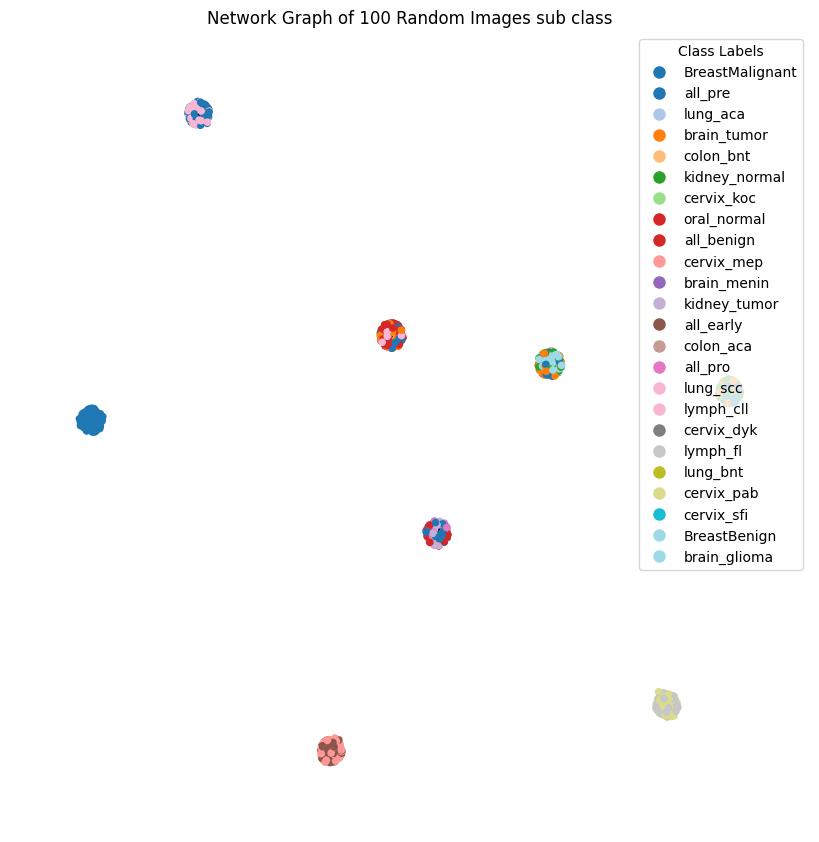

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random

# Load the CSV file (replace 'your_dataset.csv' with the actual path)
data = combined

# Randomly select 100 images
random.seed(42)  # Set a seed for reproducibility
sample_data = data.sample(n=1000)

G = nx.Graph()

# Add nodes for each image
for index, row in sample_data.iterrows():
    G.add_node(row['image_path'], main_class=row['main_class'])

# Create edges between images of the same class
for main_class in sample_data['main_class'].unique():
    images_in_class = sample_data[sample_data['main_class'] == main_class]
    image_paths = images_in_class['image_path'].tolist()
    for i in range(len(image_paths)):
        for j in range(i + 1, len(image_paths)):
            G.add_edge(image_paths[i], image_paths[j])

# Define node colors based on main_class
node_colors = [sample_data[sample_data['image_path'] == node]['sub_class'].values[0] for node in G.nodes]

# Visualize the graph
class_labels = sample_data['sub_class'].unique()
label_to_int = {label: i for i, label in enumerate(class_labels)}
int_labels = [label_to_int[label] for label in sample_data['sub_class']]

# Create a mapping from node to its integer label
node_to_int_label = {node: int_labels[i] for i, node in enumerate(G.nodes)}

pos = nx.spring_layout(G)  # Define a layout for the nodes
plt.figure(figsize=(8, 8))

# Use integer labels as colors
node_colors = [int_labels[node_to_int_label[node]] for node in G.nodes]

cmap = plt.get_cmap('tab20', len(class_labels))
nx.draw(G, pos, with_labels=False, node_size=20, node_color=node_colors, cmap=cmap)

# Create a legend
legend_labels = {i: label for i, label in enumerate(class_labels)}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[i],
                             markersize=10, markerfacecolor=cmap(i)) for i in range(len(class_labels))]
plt.legend(handles=legend_handles, title="Class Labels", loc='upper right')

plt.title('Network Graph of 100 Random Images sub class')
plt.savefig('nx_sub.png')
plt.show()


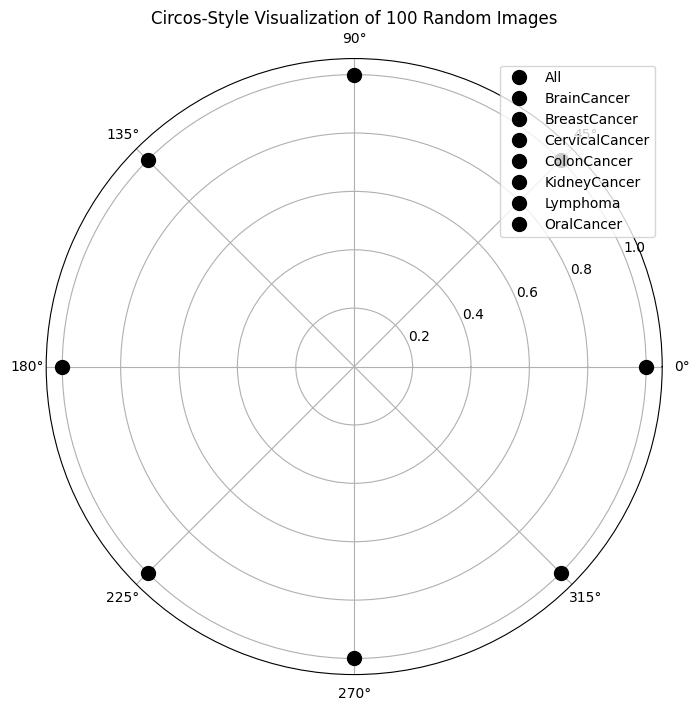

In [ ]:
import matplotlib.pyplot as plt

# Load the CSV file (replace 'your_dataset.csv' with the actual path)
data = combined

# Randomly select 100 images
random.seed(42)  # Set a seed for reproducibility
sample_data = data.sample(n=100)

# Group data by class
class_groups = sample_data.groupby('main_class')

# Define colors for each class
class_colors = {
    'Class1': 'red',
    'Class2': 'blue',
    'Class3': 'green',
    # Add more classes and colors as needed
}

# Create a circular plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

# Set the radial axis range
ax.set_rmax(1.2)

# Define the number of classes
num_classes = len(class_groups)

# Create a list of angles to position each class
angles = [i * 2 * 3.141592653589793 / num_classes for i in range(num_classes)]

# Loop through class groups and plot data in circular tracks
for i, (class_name, group) in enumerate(class_groups):
    ax.plot(angles[i], 1, 'o', markersize=10, color=class_colors.get(class_name, 'black'), label=class_name)

# Add a legend
ax.legend(loc='upper right')

# Set the title
plt.title('Circos-Style Visualization of 100 Random Images')

# Display the circular plot
plt.show()


IndexError: ignored

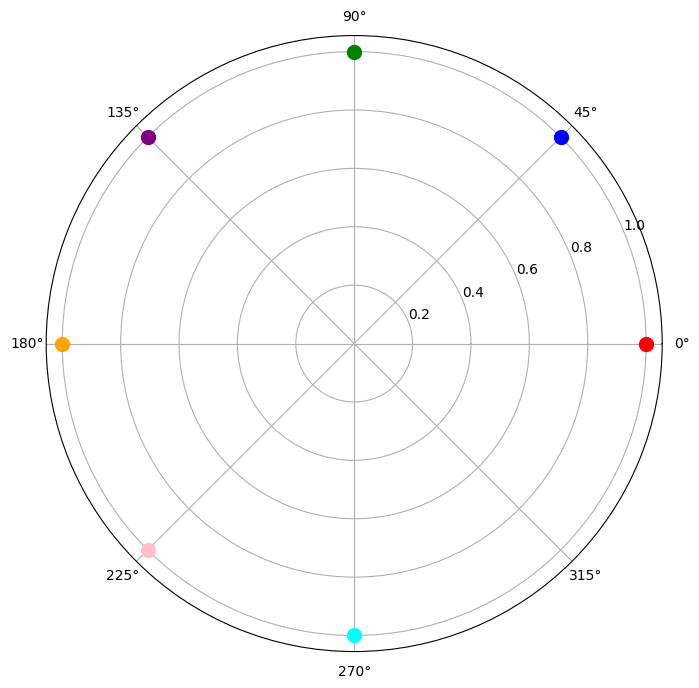

In [ ]:
import matplotlib.pyplot as plt

# Load the CSV file (replace 'your_dataset.csv' with the actual path)
data = combined

# Randomly select 100 images
random.seed(42)  # Set a seed for reproducibility
sample_data = data.sample(n=500)

# Group data by class
class_groups = sample_data.groupby('main_class')

# Define 7 distinct colors for 7 classes
class_colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'cyan']

# Create a circular plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

# Set the radial axis range
ax.set_rmax(1.2)

# Define the number of classes
num_classes = len(class_groups)

# Create a list of angles to position each class
angles = [i * 2 * 3.141592653589793 / num_classes for i in range(num_classes)]

# Loop through class groups and plot data in circular tracks
for i, (class_name, group) in enumerate(class_groups):
    ax.plot(angles[i], 1, 'o', markersize=10, color=class_colors[i], label=class_name)

# Add a legend
ax.legend(loc='upper right')

# Set the title
plt.title('Circos-Style Visualization of 100 Random Images')

# Display the circular plot
plt.show()


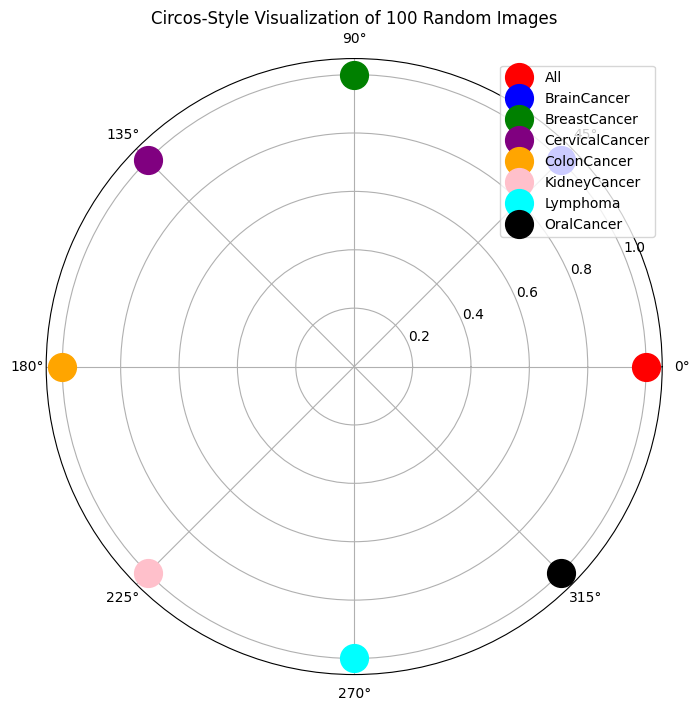

In [ ]:
import matplotlib.pyplot as plt

# Load the CSV file (replace 'your_dataset.csv' with the actual path)
data = combined

# Randomly select 100 images
random.seed(42)  # Set a seed for reproducibility
sample_data = data.sample(n=100)

# Group data by class
class_groups = sample_data.groupby('main_class')

# Define 7 distinct colors for 7 classes
class_colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'cyan','black']

# Create a circular plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

# Set the radial axis range
ax.set_rmax(1.2)

# Define the number of classes
num_classes = len(class_groups)

# Create a list of angles to position each class
angles = [i * 2 * 3.141592653589793 / num_classes for i in range(num_classes)]

# Loop through class groups and plot data in circular tracks
for i, (class_name, group) in enumerate(class_groups):
    ax.plot(angles[i], 1, 'o', markersize=20, color=class_colors[i], label=class_name)

# Add a legend
ax.legend(loc='upper right')

# Set the title
plt.title('Circos-Style Visualization of 100 Random Images')

# Display the circular plot
plt.show()


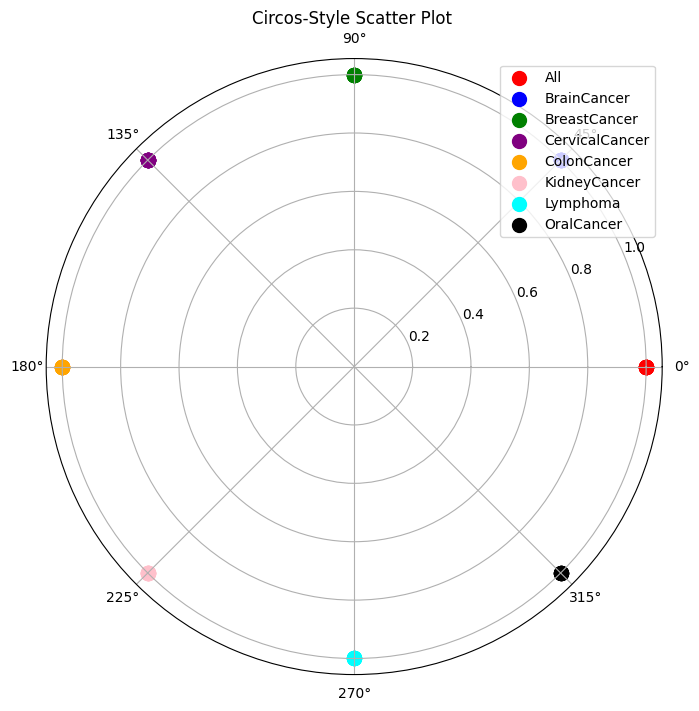

In [ ]:
import matplotlib.pyplot as plt

# Load the CSV file (replace 'your_dataset.csv' with the actual path)
data = combined

# Randomly select 100 images
random.seed(42)  # Set a seed for reproducibility
sample_data = data.sample(n=100)

# Group data by class
class_groups = sample_data.groupby('main_class')

# Define 7 distinct colors for 7 classes
class_colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'cyan', 'black']

# Create a circular plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

# Set the radial axis range
ax.set_rmax(1.2)

# Define the number of classes
num_classes = len(class_groups)

# Create a list of angles to position each class
angles = [i * 2 * 3.141592653589793 / num_classes for i in range(num_classes)]

# Loop through class groups and plot data in a circular scatter plot
for i, (class_name, group) in enumerate(class_groups):
    # Calculate polar coordinates for the scatter plot
    r = [1] * len(group)  # Set the radius to 1 for all points in the class
    theta = [angles[i]] * len(group)  # Set the angle based on the class

    ax.scatter(theta, r, s=100, c=class_colors[i], label=class_name)

# Add a legend
ax.legend(loc='upper right')

# Set the title
plt.title('Circos-Style Scatter Plot ')
plt.savefig('circos_image.png')

# Display the circular scatter plot
plt.show()


In [ ]:
inception='/content/drive/MyDrive/Multicancer/inception_history.pkl'
resnet='/content/drive/MyDrive/Multicancer/resnet50_history.pkl'
vgg='/content/drive/MyDrive/Multicancer/vgg_history.pkl'
xception='/content/drive/MyDrive/Multicancer/xception_model_history.pkl'
mobilenet='/content/drive/MyDrive/Multicancer/xception_model_history.pkl'

In [ ]:
accuracy_keys = [key for key in history.keys() if 'accuracy' in key]
loss_keys = [key for key in history.keys() if 'loss' in key]
loss_keys

['dense_14_accuracy',
 'dense_15_accuracy',
 'val_dense_14_accuracy',
 'val_dense_15_accuracy']

In [ ]:
import pickle
import matplotlib.pyplot as plt

# Define the file paths for each model's history
model_files = {
    'Inception': '/content/drive/MyDrive/Multicancer/inception_history.pkl',
    'ResNet': '/content/drive/MyDrive/Multicancer/resnet50_history.pkl',
    'VGG': '/content/drive/MyDrive/Multicancer/vgg_history.pkl',
    'Xception': '/content/drive/MyDrive/Multicancer/xception_model_history.pkl',
    'MobileNet': '/content/drive/MyDrive/Multicancer/mobilenet_history.pkl'
}

# Initialize lists to store data
train_main_class_acc = {}
train_sub_class_acc={}

train_main_loss = {}
train_sub_loss={}

val_main_acc = {}
val_sub_acc={}
val_main_loss={}
val_sub_loss={}



# Load data from each file and store it in the respective dictionaries
for model, file_path in model_files.items():
    with open(file_path, 'rb') as file:
        history = pickle.load(file)
        train_main_class_acc[model] = history['dense_2_accuracy']
        train_sub_class_acc[model]= history['dense_3_accuracy']

        train_main_loss[model] = history['dense_2_loss']
        train_sub_loss[model] = history['dense_3_loss']

        val_main_acc[model] = history['val_dense_2_accuracy']
        val_sub_acc[model]= history['val_dense_3_accuracy']

        val_main_loss[model] = history['val_dense_2_loss']
        val_sub_loss[model] = history['val_dense_3_loss']


# Create subplots for training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for model, acc in train_main_class_acc.items():
    plt.plot(acc, label=model)
plt.title('Training Main Class Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Main Class Accuracy')
plt.legend()

# Create subplots for training and validation loss
plt.subplot(1, 2, 2)
for model, loss in train_sub_class_acc.items():
    plt.plot(loss, label=model)
plt.title('Training Sub Class Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Sub Class Accuracy')
plt.legend()

plt.tight_layout()

# Create separate plots for validation accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for model, acc in train_main_loss.items():
    plt.plot(acc, label=model)
plt.title('Training Main Class Loss')
plt.xlabel('Epoch')
plt.ylabel('Main Class Loss')
plt.legend()

plt.subplot(1, 2, 2)
for model, loss in train_sub_loss.items():
    plt.plot(loss, label=model)
plt.title('Training Sub Class Loss')
plt.xlabel('Epoch')
plt.ylabel('Sub Class Loss')
plt.legend()

plt.tight_layout()
plt.show()




##################################################



plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for model, acc in train_main_class_acc.items():
    plt.plot(acc, label=model)
plt.title('Validation Main Class Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Main Class Accuracy')
plt.legend()

# Create subplots for training and validation loss
plt.subplot(1, 2, 2)
for model, loss in train_sub_class_acc.items():
    plt.plot(loss, label=model)
plt.title('Validation Sub Class Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Sub Class Accuracy')
plt.legend()

plt.tight_layout()

# Create separate plots for validation accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for model, acc in train_main_loss.items():
    plt.plot(acc, label=model)
plt.title('Validation Main Class Loss')
plt.xlabel('Epoch')
plt.ylabel('Main Class Loss')
plt.legend()

plt.subplot(1, 2, 2)
for model, loss in train_sub_loss.items():
    plt.plot(loss, label=model)
plt.title('Validation Sub Class Loss')
plt.xlabel('Epoch')
plt.ylabel('Sub Class Loss')
plt.legend()

plt.tight_layout()
plt.show()

KeyError: ignored

[0.8963310122489929, 0.9406605958938599, 0.9510005116462708, 0.9570004343986511, 0.9628703594207764, 0.965570330619812, 0.9679403305053711, 0.9706602692604065, 0.97169029712677, 0.9742002487182617, 0.9828001856803894, 0.9845801591873169, 0.9854201674461365, 0.9862401485443115, 0.9870001077651978, 0.9875401258468628, 0.9876101016998291, 0.9884400963783264, 0.9885700941085815, 0.9891300797462463]
[0.9709103107452393, 0.9739302396774292, 0.9769602417945862, 0.9793401956558228, 0.9819802045822144, 0.9824701547622681, 0.9822402000427246, 0.9837101697921753, 0.9850501418113708, 0.9844101667404175, 0.9898701310157776, 0.9916400909423828, 0.9919200539588928, 0.993130087852478, 0.9930700659751892, 0.9934400916099548, 0.9940100312232971, 0.9941100478172302, 0.994100034236908, 0.9942500591278076]
[0.9616403579711914, 0.988520085811615, 0.9907000660896301, 0.992590069770813, 0.9932300448417664, 0.9935600757598877, 0.9939300417900085, 0.9939000606536865, 0.9950400590896606, 0.9941800832748413, 0.99

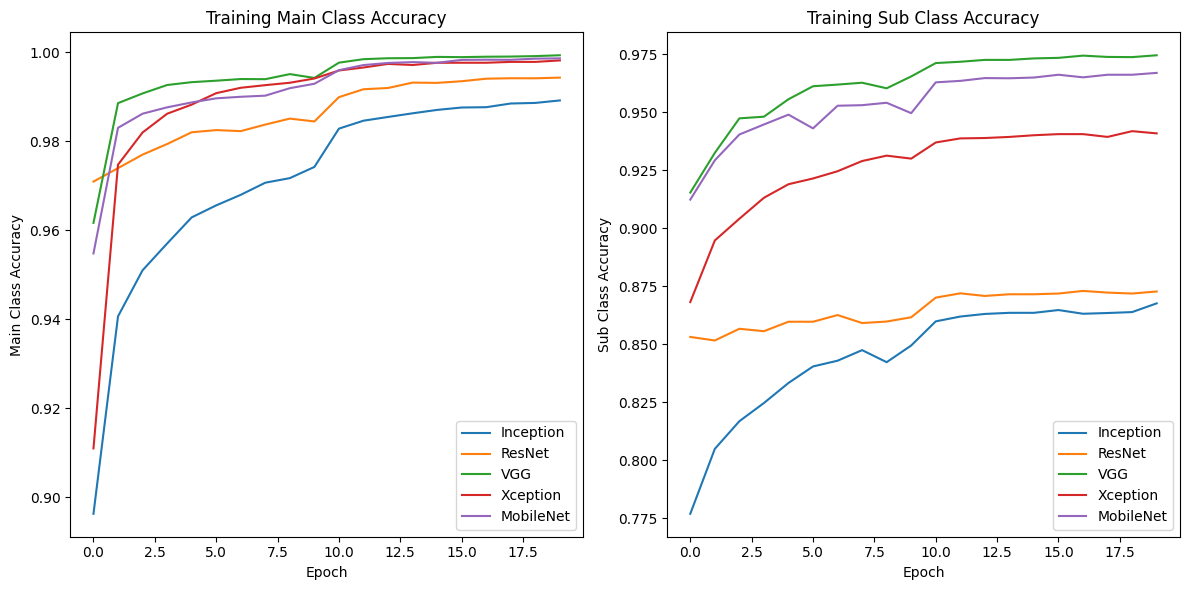

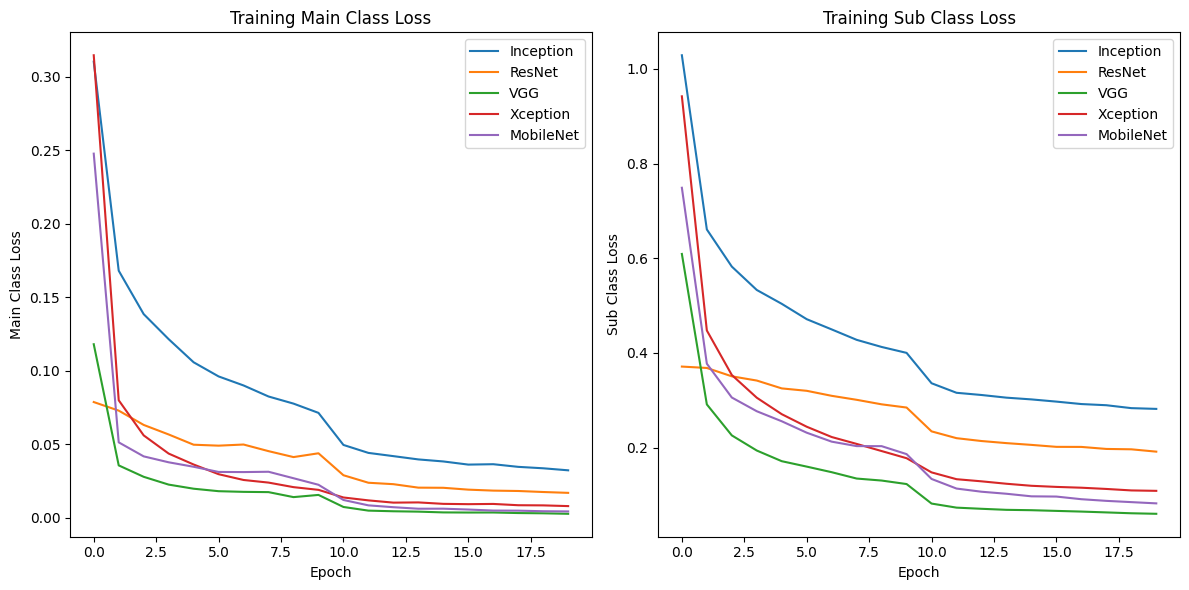

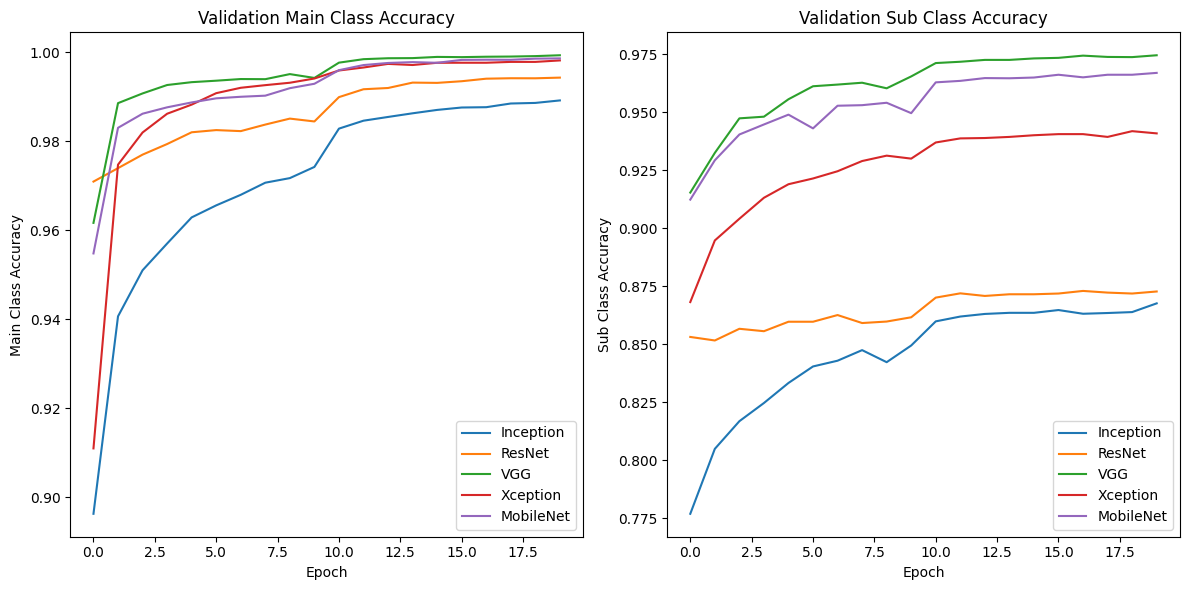

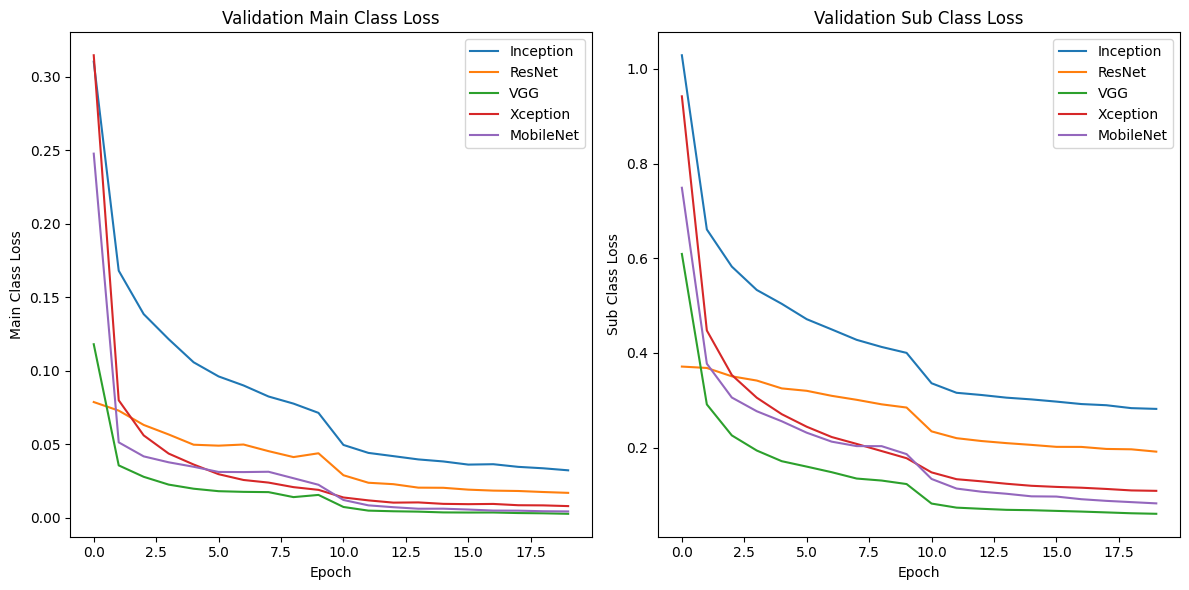

In [ ]:
import pickle
import matplotlib.pyplot as plt

# Define the file paths for each model's history
model_files = {
    'Inception': '/content/drive/MyDrive/Multicancer/inception_history.pkl',
    'ResNet': '/content/drive/MyDrive/Multicancer/resnet50_history.pkl',
    'VGG': '/content/drive/MyDrive/Multicancer/vgg_history.pkl',
    'Xception': '/content/drive/MyDrive/Multicancer/xception_model_history.pkl',
    'MobileNet': '/content/drive/MyDrive/Multicancer/mobilenet_history.pkl'
}

# Initialize dictionaries to store data
train_main_class_acc = {}
train_sub_class_acc={}

train_main_loss = {}
train_sub_loss={}

val_main_acc = {}
val_sub_acc={}
val_main_loss={}
val_sub_loss={}
train_loss={}
val_loss={}


# Load data from each file and store it in the respective dictionaries
for model, file_path in model_files.items():
    with open(file_path, 'rb') as file:
        history = pickle.load(file)

        # Extract all accuracy and loss keys for this model
        accuracy_keys = [key for key in history.keys() if 'accuracy' in key]
        loss_keys = [key for key in history.keys() if 'loss' in key]



        train_main_class_acc[model]=history[accuracy_keys[0]]
        print(train_main_class_acc[model])
#         # Create dictionaries to store accuracy and loss values for this model
        train_main_class_acc[model],train_sub_class_acc[model],val_main_acc[model],val_sub_acc[model] =history[accuracy_keys[0]],history[accuracy_keys[3]],history[accuracy_keys[3]],history[accuracy_keys[3]]
        train_loss[model],train_main_loss[model],train_sub_loss[model],val_loss[model],val_main_loss[model],val_sub_loss[model]= history[loss_keys[0]],history[loss_keys[1]],history[loss_keys[2]],history[loss_keys[3]],history[loss_keys[4]],history[loss_keys[5]]

#         # Validate accuracy and loss keys for validation data
#         val_accuracy_keys = [key for key in history.keys() if 'val_accuracy' in key]
#         val_loss_keys = [key for key in history.keys() if 'val_loss' in key]

#         if val_accuracy_keys and val_loss_keys:
#             val_main_acc[model],val_sub_acc[model] = {key: history[key] for key in val_accuracy_keys}
#             val_main_loss[model],val_sub_loss[model] = {key: history[key] for key in val_loss_keys}

# # Define a function to plot metrics

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for model, acc in train_main_class_acc.items():
    plt.plot(acc, label=model)
plt.title('Training Main Class Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Main Class Accuracy')
plt.legend()
#plt.savefig('Training Main Class Accuracy.png')

# Create subplots for training and validation loss
plt.subplot(1, 2, 2)
for model, loss in train_sub_class_acc.items():
    plt.plot(loss, label=model)
plt.title('Training Sub Class Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Sub Class Accuracy')
plt.legend()


plt.tight_layout()


# Create separate plots for validation accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for model, acc in train_main_loss.items():
    plt.plot(acc, label=model)
plt.title('Training Main Class Loss')
plt.xlabel('Epoch')
plt.ylabel('Main Class Loss')
plt.legend()
#plt.savefig('Training Main Class Loss.png')

plt.subplot(1, 2, 2)
for model, loss in train_sub_loss.items():
    plt.plot(loss, label=model)
plt.title('Training Sub Class Loss')
plt.xlabel('Epoch')
plt.ylabel('Sub Class Loss')
plt.legend()
#plt.savefig('Training Sub Class Loss.png')

plt.tight_layout()
plt.savefig('Training Loss.png')
plt.show()




##################################################



plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for model, acc in train_main_class_acc.items():
    plt.plot(acc, label=model)
plt.title('Validation Main Class Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Main Class Accuracy')
plt.legend()
#plt.savefig('Validation Main Class Accuracy.png')

# Create subplots for training and validation loss
plt.subplot(1, 2, 2)
for model, loss in train_sub_class_acc.items():
    plt.plot(loss, label=model)
plt.title('Validation Sub Class Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Sub Class Accuracy')
plt.legend()
#plt.savefig('Validation Sub Class Accuracy.png')

plt.tight_layout()

# Create separate plots for validation accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for model, acc in train_main_loss.items():
    plt.plot(acc, label=model)
plt.title('Validation Main Class Loss')
plt.xlabel('Epoch')
plt.ylabel('Main Class Loss')
plt.legend()
#plt.savefig('Validation Main Class Loss.png')

plt.subplot(1, 2, 2)
for model, loss in train_sub_loss.items():
    plt.plot(loss, label=model)
plt.title('Validation Sub Class Loss')
plt.xlabel('Epoch')
plt.ylabel('Sub Class Loss')
plt.legend()
#plt.savefig('Validation Sub Class Loss.png')

plt.tight_layout()
plt.show()



